# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [141]:
# this will help in making the Python code more structured automatically when coding with Jupiter(good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading the dataset

In [142]:
project=pd.read_csv("used_device_data.csv")

In [143]:
df=project.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
# let's check the shape of the data
df.shape

(3454, 15)

- There are 3454 rows and 15 columns in the dataset.

In [ ]:
 #let's check the first 5 rows of the data
df.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no           13.00   
1      Honor  Android        17.30  yes  yes           13.00   
2      Honor  Android        16.69  yes  yes           13.00   
3      Honor  Android        25.50  yes  yes           13.00   
4      Honor  Android        15.32  yes   no           13.00   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0              5.00       64.00 3.00  3020.00  146.00          2020   
1             16.00      128.00 8.00  4300.00  213.00          2020   
2              8.00      128.00 8.00  4200.00  213.00          2020   
3              8.00       64.00 6.00  7250.00  480.00          2020   
4              8.00       64.00 3.00  5000.00  185.00          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127                   4.31                  4.72  
1        325                   5.16                  5.52  
2        162                   5.11                  5.88  
3        345                   5.14                  5.63  
4        293                   4.39                  4.95

In [ ]:
#checking the total number of phones sold according to brand
unique_brand=df["brand_name"].value_counts()
print(unique_brand)

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: brand_name, dtype: int64


- The top 3 brand names mentioned on the data set are Samsung,Huawei, and others for brands of phones not mentioned.

- The bottom 3 brands names f phones mentioned in the data set are Infinix,Google, and OnePlus.

In [ ]:
#checking the total number of phones sold according to internal memory
unique_int_mem=df["int_memory"].value_counts()
print(unique_int_mem)

16.00      1283
32.00      1083
64.00       509
128.00      372
256.00       86
512.00       44
0.06         18
0.10         17
8.00         12
4.00         10
1024.00       8
0.50          4
0.20          2
24.00         1
0.01          1
Name: int_memory, dtype: int64


- Phones with 16gb accounted for the most phones on the dataset.

In [ ]:
#checking the total number of phones sold according to OS
unique_os=df["os"].value_counts()
print(unique_os)

Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64


- Android phones was the most in-demand Os on the dataset.
- While IOS phones was the least demanded on the data set.

In [ ]:
#Lets check unique number of phones sold according to main camera mp
unique_maincam=df["main_camera_mp"].value_counts()
print(unique_maincam)

13.00    1035
8.00      755
5.00      546
12.00     189
2.00      171
16.00     154
3.15      122
0.30       69
10.50      30
1.30       26
23.00      19
21.00      19
20.70      16
20.00      13
14.50      13
12.20      12
4.00       10
12.30       9
19.00       8
8.10        7
13.10       6
10.00       6
24.00       5
3.00        5
12.50       4
48.00       4
6.50        4
6.70        4
21.20       2
21.50       1
1.20        1
16.30       1
22.60       1
18.00       1
12.60       1
20.10       1
41.00       1
20.20       1
1.00        1
0.08        1
22.50       1
Name: main_camera_mp, dtype: int64


- 13mp topped the list for the most in-demand main camera specification.

In [ ]:
#Lets check unique number of phones sold according to screen_size
unique_scrensize=df["screen_size"].value_counts()
print(unique_scrensize)

12.70    575
12.83    409
10.29    219
10.16    188
15.24    129
        ... 
17.40      1
15.82      1
14.53      1
16.15      1
14.81      1
Name: screen_size, Length: 142, dtype: int64


- 12.70 cm screen sized phones was a the most popular choice in terms of screen size.

In [ ]:
#checking the total number of phones sold according to ram
unique_os=df["ram"].value_counts()
print(unique_os)

4.00     2815
6.00      154
8.00      130
2.00       90
0.25       83
3.00       81
1.00       34
12.00      18
0.02       18
0.03       17
0.50        9
1.50        1
Name: ram, dtype: int64


- Phones with 4gb Ram was the most popular choice for buyers.

- There are phones observed to have Rams less than 500mb which may be earlier feature phones on the list.

In [ ]:
# let's check column types and number of values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

- There are null values in the following columns: main_camera_mp, selfie_camera_mp, int_memory, ram,battery, weight.
- The fact that data type seen in each column corresponds with what is expected signifies these null values are mainly missing values.
- The data types in the data set include; Float,interger64, and Objects.

In [ ]:
#Checking statistcal summary
df.describe(include="all").T

count unique      top  freq    mean     std     min  \
brand_name               3454     34   Others   502     NaN     NaN     NaN   
os                       3454      4  Android  3214     NaN     NaN     NaN   
screen_size           3454.00    NaN      NaN   NaN   13.71    3.81    5.08   
4g                       3454      2      yes  2335     NaN     NaN     NaN   
5g                       3454      2       no  3302     NaN     NaN     NaN   
main_camera_mp        3275.00    NaN      NaN   NaN    9.46    4.82    0.08   
selfie_camera_mp      3452.00    NaN      NaN   NaN    6.55    6.97    0.00   
int_memory            3450.00    NaN      NaN   NaN   54.57   84.97    0.01   
ram                   3450.00    NaN      NaN   NaN    4.04    1.37    0.02   
battery               3448.00    NaN      NaN   NaN 3133.40 1299.68  500.00   
weight                3447.00    NaN      NaN   NaN  182.75   88.41   69.00   
release_year          3454.00    NaN      NaN   NaN 2015.97    2.30 2013.00   
days_used             3454.00    NaN      NaN   NaN  674.87  248.58   91.00   
normalized_used_price 3454.00    NaN      NaN   NaN    4.36    0.59    1.54   
normalized_new_price  3454.00    NaN      NaN   NaN    5.23    0.68    2.90   

                          25%     50%     75%     max  
brand_name                NaN     NaN     NaN     NaN  
os                        NaN     NaN     NaN     NaN  
screen_size             12.70   12.83   15.34   30.71  
4g                        NaN     NaN     NaN     NaN  
5g                        NaN     NaN     NaN     NaN  
main_camera_mp           5.00    8.00   13.00   48.00  
selfie_camera_mp         2.00    5.00    8.00   32.00  
int_memory              16.00   32.00   64.00 1024.00  
ram                      4.00    4.00    4.00   12.00  
battery               2100.00 3000.00 4000.00 9720.00  
weight                 142.00  160.00  185.00  855.00  
release_year          2014.00 2015.50 2018.00 2020.00  
days_used              533.50  690.50  868.75 1094.00  
normalized_used_price    4.03    4.41    4.76    6.62  
normalized_new_price     4.79    5.25    5.67    7.85

- There 34 unique brand name items mentioned in the dataset.
- There for unique Os, with Android the top OS.
- The average and largest screen size in the data set is 13.71cm and 30.71cm respectively.
- The range main_camera_mp and selfie camera mp is quite large.
- The mean and median of Internal memory are wide apart signifying some moderate skewwness in internal memory variables.
- The range of battery is quite significant eventhough the mean and median are quite close.
- Just like battery, the is also a wide range for weight in the dataset.
- The oldest phones on the list where does relaesed as far back as 2013, while the newest phones were does released in 2020.
- The average number days phones were used is 674 days.The is also a wide range for number of days phones were used, with the most used phones clocking usage days as high as 1094, while the least used was as low as 91 days.
- The normalized used phone price ranged from as low as 1.54 Euros to as high as 6.62 Euros. With the normalized average price of used phones at 4.35 Euros.
-   The normalized new phone price ranged from as low as 2.9 Euros to as high as 7.85 Euros. With the normalized average price of used phones at 5.23 Euros.

In [ ]:
#Check duplicate values
df.duplicated().sum()

0

- There are no duplicate rows in data set.

In [ ]:
#checking missing values
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

- This has confirmed my earlier suspicion of missing values in te datasets.
- Main camera mp column has significant amount of missing values, 179 to be precise.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

**Answers(from EDA done below):**

1. The normalized used device distribution is slightly left skewwed but could considered a normal distribution. There are also significant numbers of outliers at both ends of the distribution with the region less than the 25% percentile having more.
2. About 93.1% of the used market space is dominated by Android devices.
3. OnePLus has the highest median ram of 5gb installed in their devices compared to other brands,while more than 75% OnePlus phones had 8gb of Ram installed.
Median Ram installed for almost the all brands with exceptions of Oneplus,Infinix,Honor, and Oppo is 4gb.
Infinix devices have the least median RAM installed of 3gb.
4. As visualized, Phones with battery capacities over 4500mah tend to weigh heavier as the weight of the phone increses.
5. There are 1228 phones available accross different brands with screen sizes over 6 inches.
6. The following brands with at least 8mp selfie camera had the largest range of selfie camera mp installed: Honor, Oppo, Samsung,and Lenovo.
the median selfie camera mp across most brands except Oppo, coolpad, Acer,Asus, Micromax, Panasonic, and Sony is 16MP.
Acer, Micromax,HTC, and Sony had the lowest median selfie mp.
Oppo has the largest median selfie mp installed among all brands.

7. Screen size in inches,Normalized new price,days used,battery,weight, Ram, Selfie camera mp, and main camera carry high correlation with normalized used price. However, normalized new price carry the highest positive correalation whlile days used carry the highest negative correlation

###1. Univariate Analysis


Defining a custom function to make ploting of Histograms and Boxplots automated for Numerical variables.

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram(green line)
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram(black line)

Defining a custom function to aid in plotting of barplot for analysing the distribution of descrete variables

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        order=df[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot




####Visualization of Screen size distribution

The standard SI unit for measuring phone screen size is in inches, hence we need to modify the column with the screen sizes converted from cm to inches,then visualize.

Text(0.5, 0, 'Screen size (inches)')

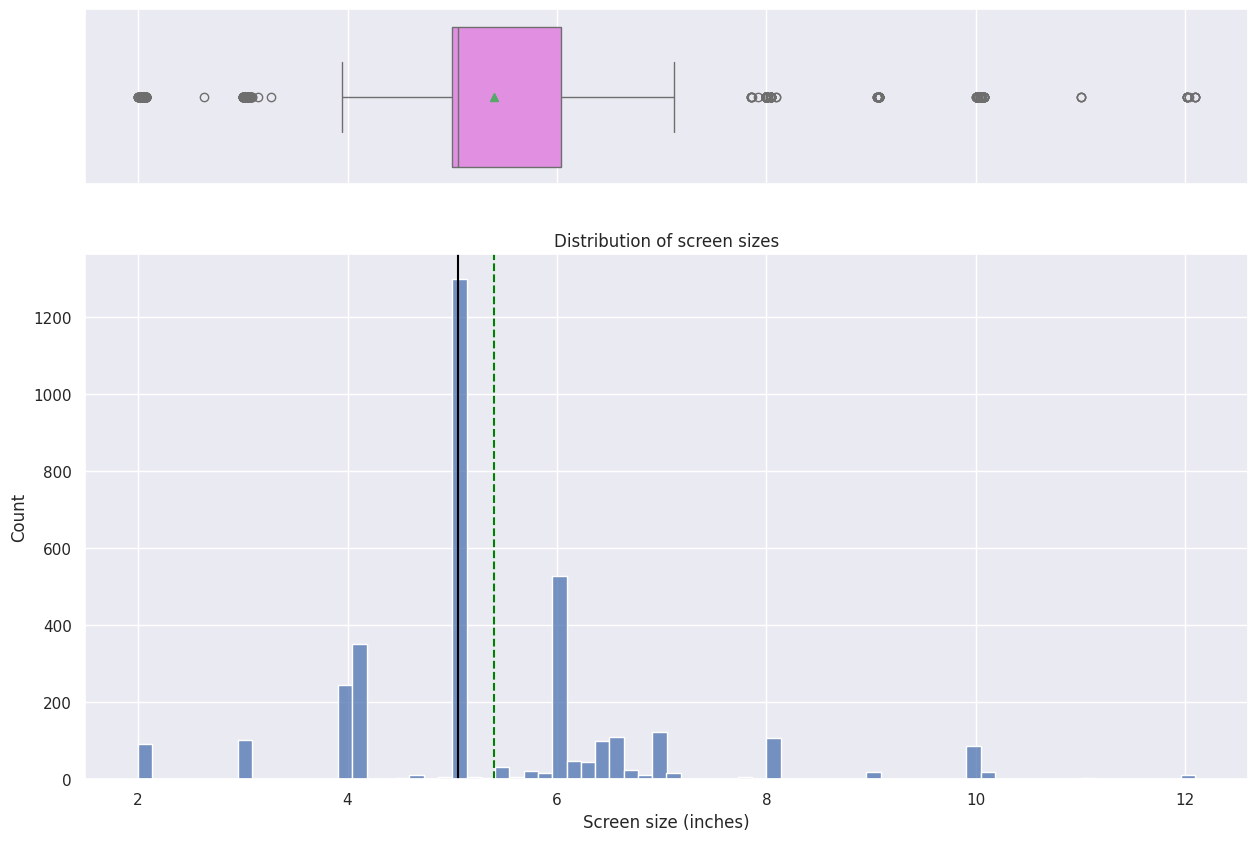

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert centimeters to inches
df['screen_size_inches'] = df['screen_size'] * 0.393701

histogram_boxplot(df, 'screen_size_inches')
plt.title('Distribution of screen sizes')
plt.xlabel('Screen size' + ' (inches)')


- Distribution is slight skewwed to the right, but can be considered as a normal ditribution.
- Lots of outliers present.

####Visualizing the distribution of main camera mp

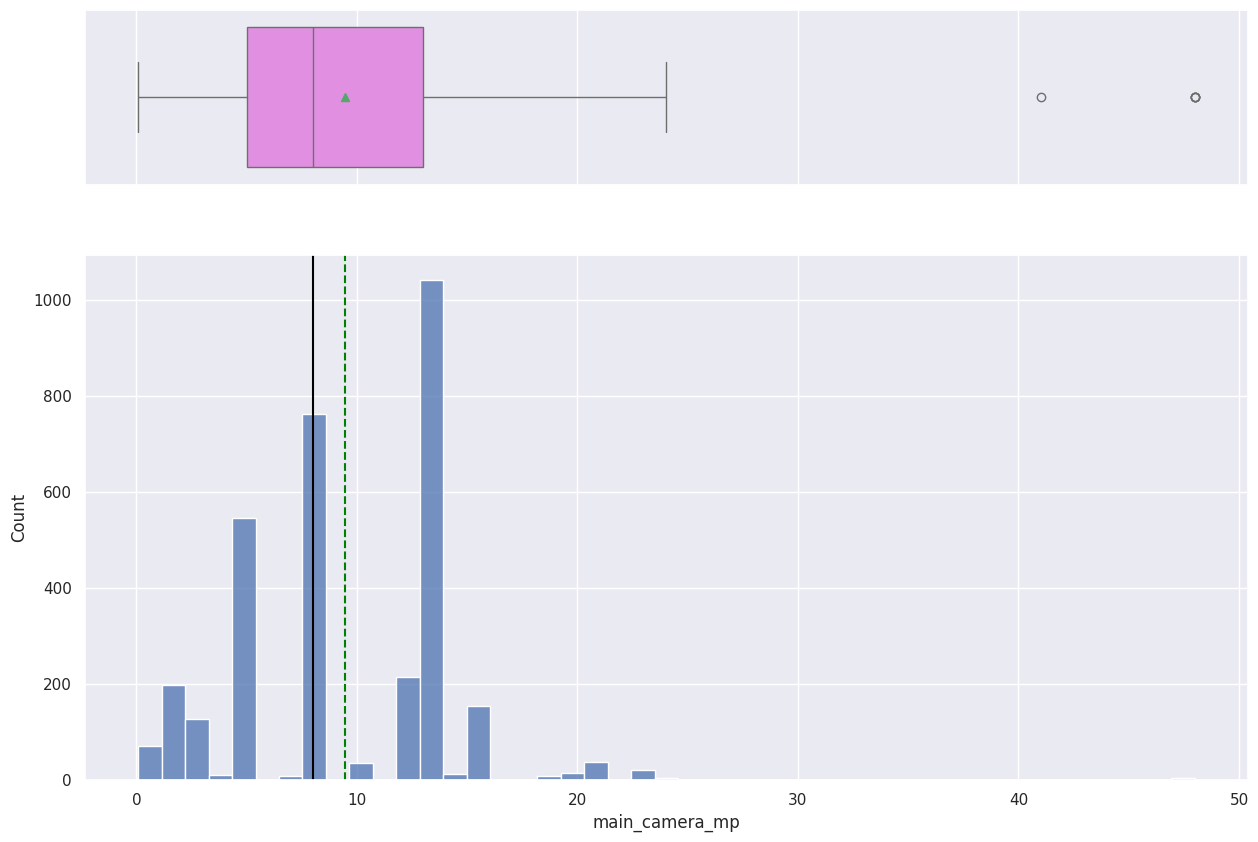

In [ ]:
histogram_boxplot(df, "main_camera_mp")

- Distribution is slight skewwed to the right, but can be considered as a normal ditribution.
- few outliers present.

####Visualizing distribution of selfie camera mp

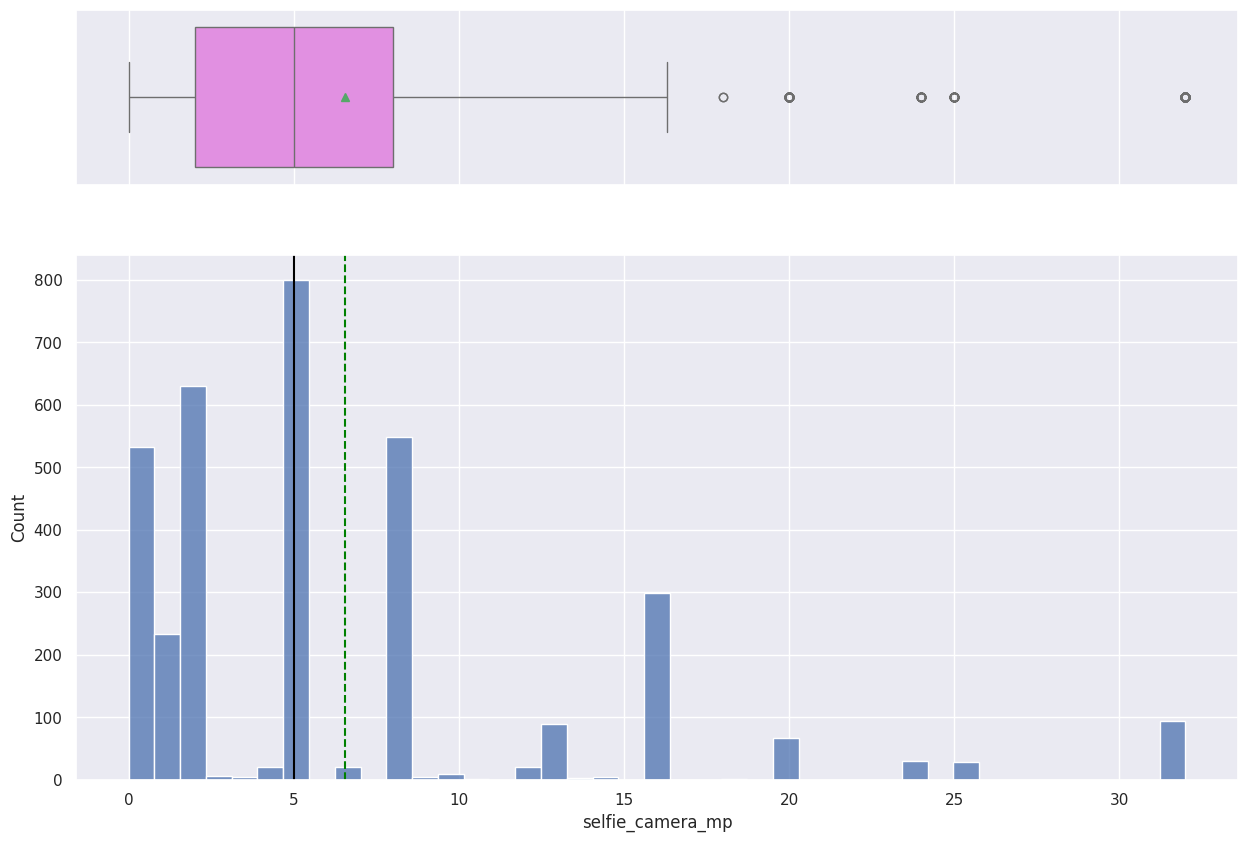

In [ ]:
histogram_boxplot(df, "selfie_camera_mp")

- Distribution is slight skewwed to the right.
-few outliers present.

####Visualization of distribution of internal memory

Text(0.5, 0, 'INT. MEMORY (GB)')

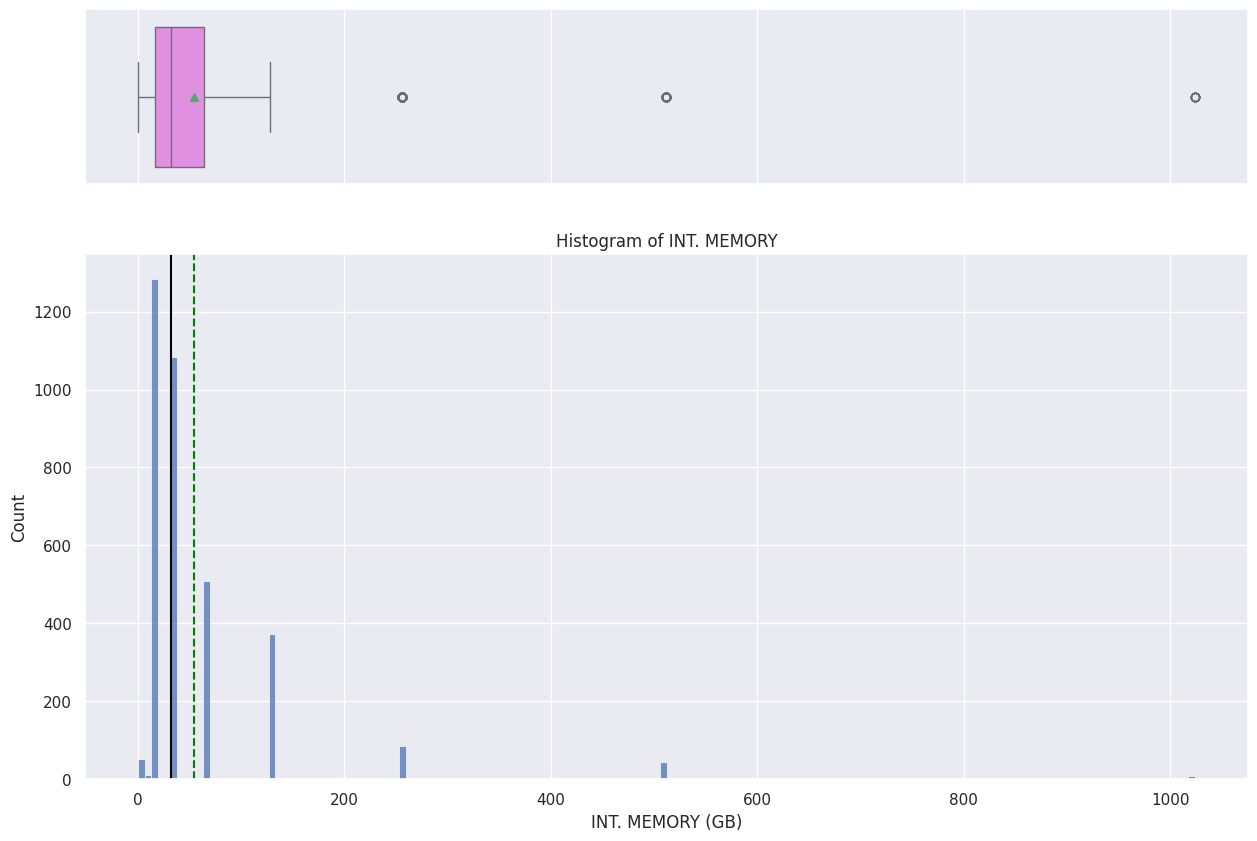

In [ ]:
histogram_boxplot(df, "int_memory")
plt.title('Histogram of INT. MEMORY')
plt.xlabel('INT. MEMORY' + ' (GB)')


- Distribution is slight skewwed to the right, but can be considered as a normal ditribution.
- few of outliers present.

####Visualization of distribution of phone RAM

Text(0.5, 0, 'RAM (GB)')

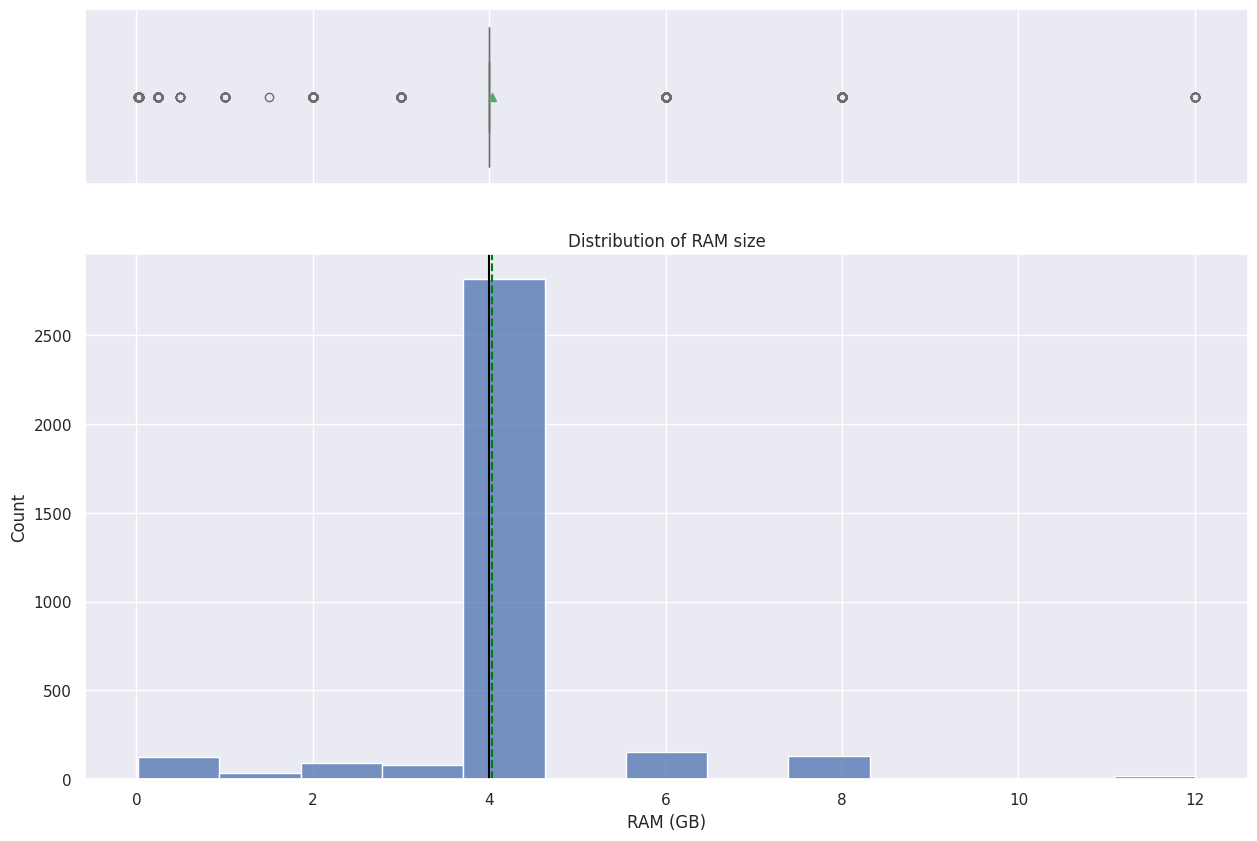

In [ ]:
histogram_boxplot(df, "ram")
plt.title('Distribution of RAM size')
plt.xlabel('RAM' + ' (GB)')

- mean, mode and median is concentrated around 4gb.
- Normal distribution present with few outliers

####Visualization of distribution of battery capacities

Text(0.5, 0, 'battery (mAH)')

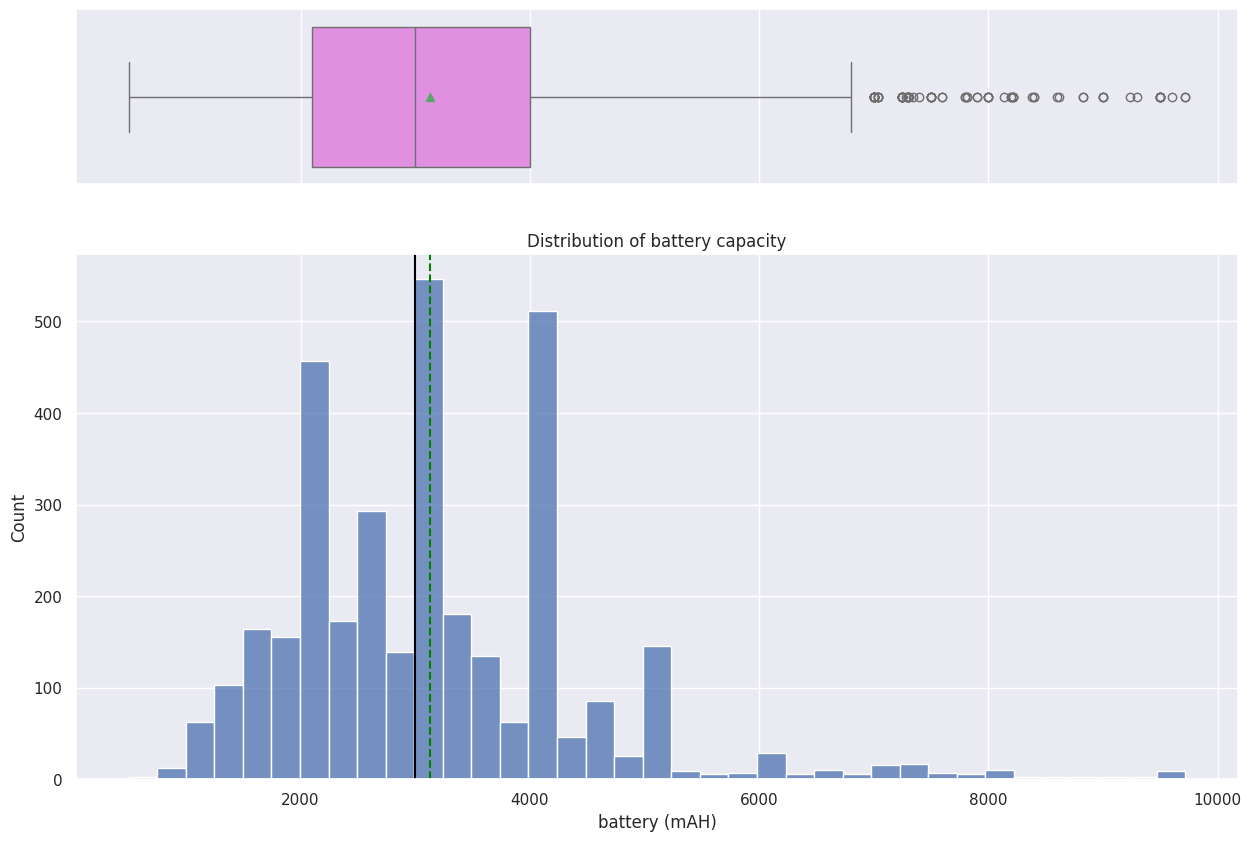

In [ ]:
histogram_boxplot(df, "battery")
plt.title('Distribution of battery capacity')
plt.xlabel('battery' + ' (mAH)')


- Distribution is slight skewwed to the right, but can be considered as a normal ditribution.
- Lots of outliers present to the right.

####Visualization of distribution of phone weight

Text(0.5, 0, 'weight (grams)')

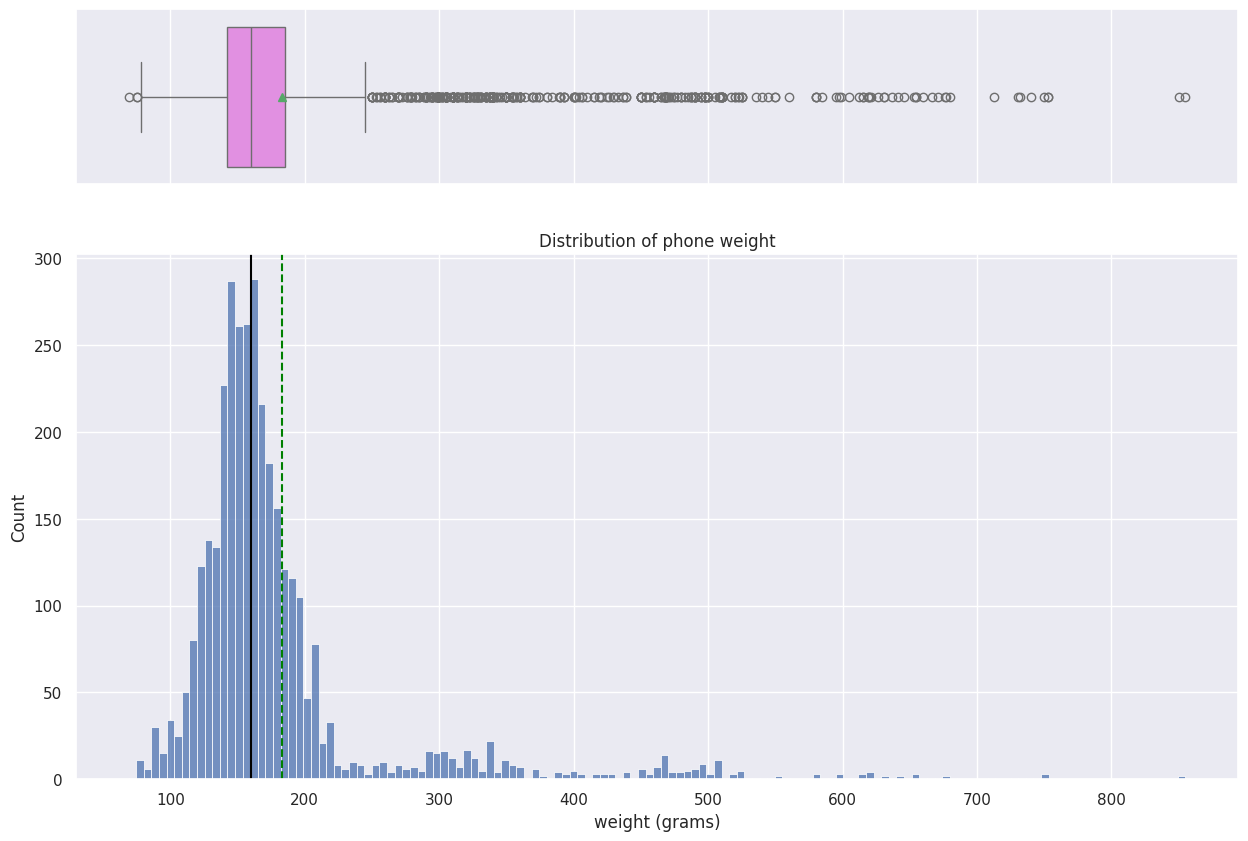

In [ ]:
histogram_boxplot(df, "weight")
plt.title('Distribution of phone weight')
plt.xlabel('weight' + ' (grams)')


- Distribution is slight skewwed to the right, but can be considered as a normal ditribution.
- Lots of outliers present especially to the right.

####Visualization of distribution of days used

Text(0.5, 1.0, 'Distribution of days_used')

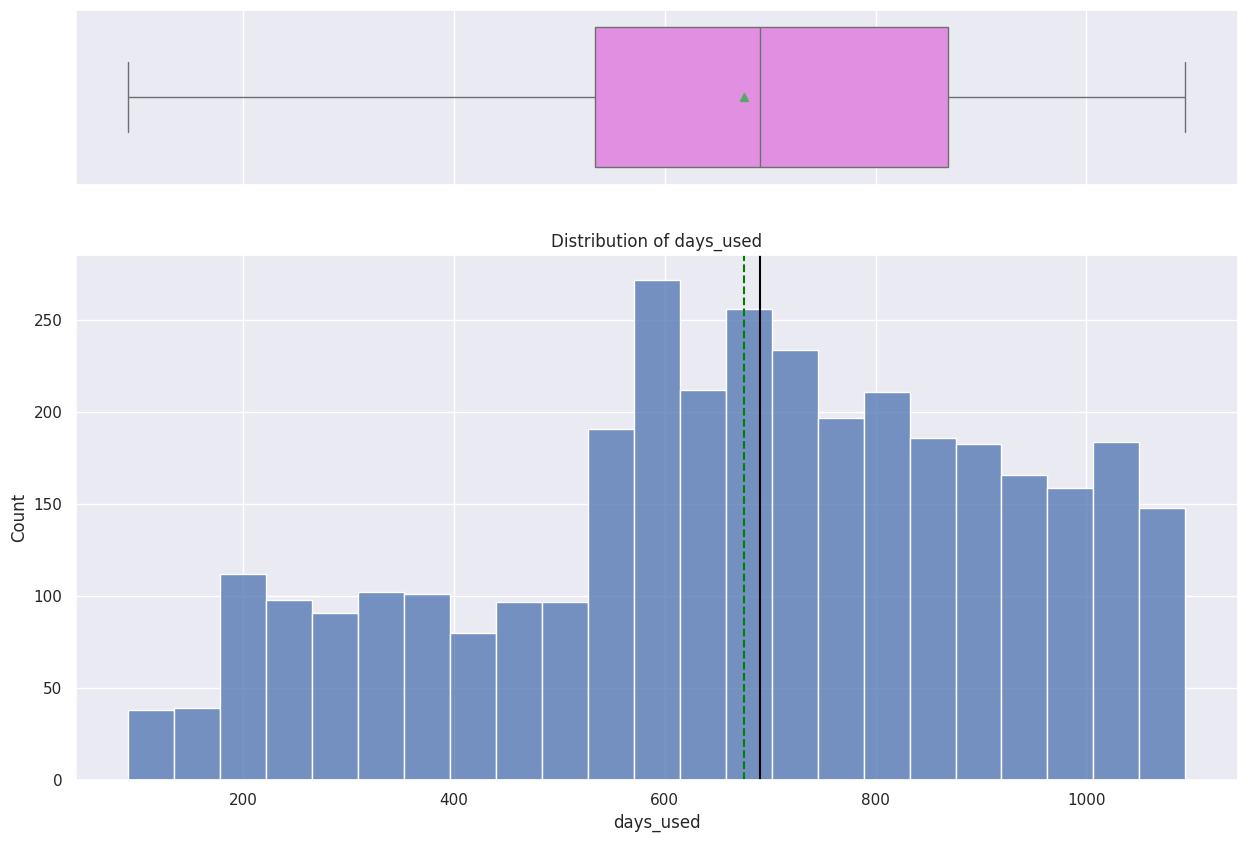

In [ ]:
histogram_boxplot(df, "days_used")
plt.title('Distribution of days_used')


- Distribution is slight skewwed to the left, but can be considered as a normal ditribution.
- No outlier present.

####Visualization of normalized_used_price

Text(0.5, 0, 'normalized_used_price (Euros)')

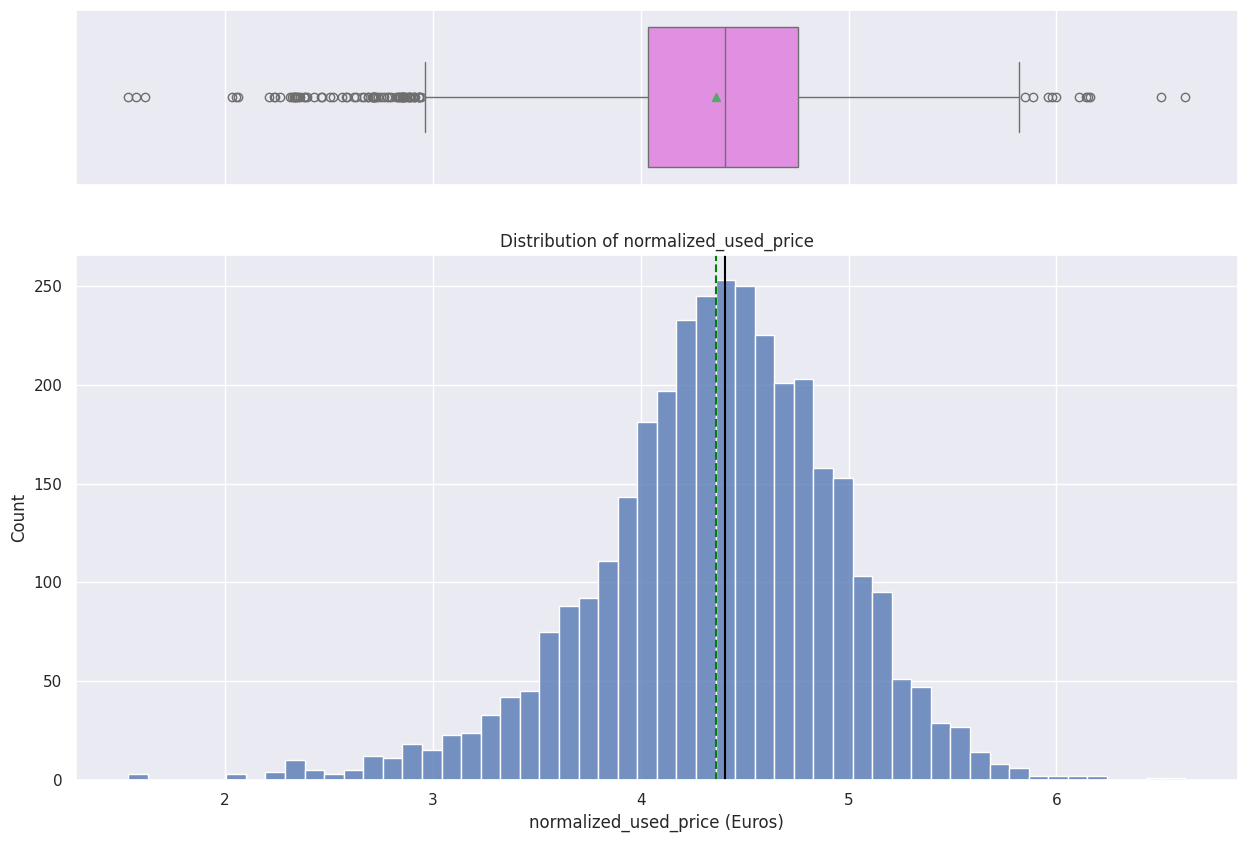

In [ ]:
histogram_boxplot(df, "normalized_used_price")
plt.title('Distribution of normalized_used_price')
plt.xlabel('normalized_used_price' + ' (Euros)')

- There are a significantly amount of outliers in the distribution in both ends of the distribution.
- The distribution is slightly left skewwed but could be considered as a normal distribution.

####Visualization of normalized_new_price

Text(0.5, 0, 'normalized_new_price (Euros)')

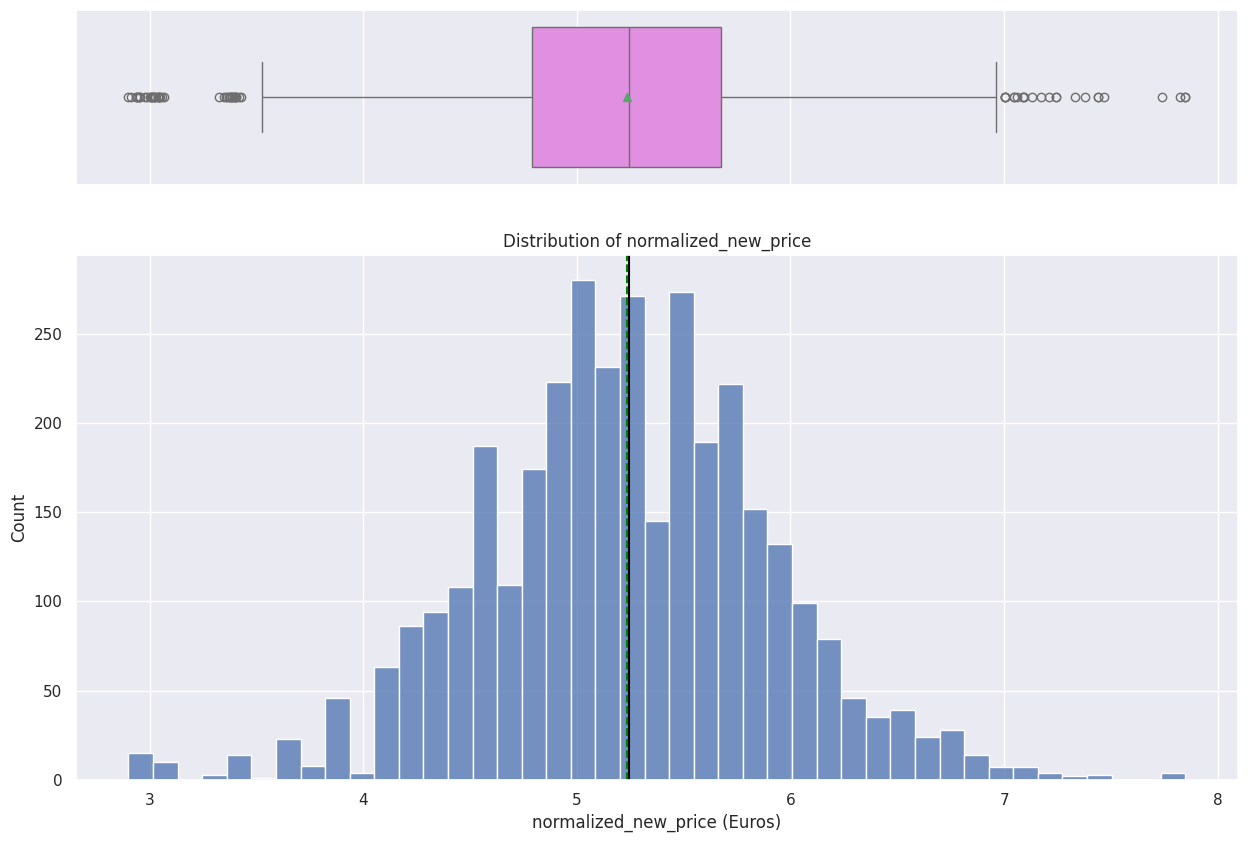

In [ ]:
histogram_boxplot(df, "normalized_new_price")
plt.title('Distribution of normalized_new_price')
plt.xlabel('normalized_new_price' + ' (Euros)')

- Distribution is slight skewwed to the left, but can be considered as a normal ditribution.
- Lots of outliers present in both sides of distribution.

####Visualization of distribution of Brand name

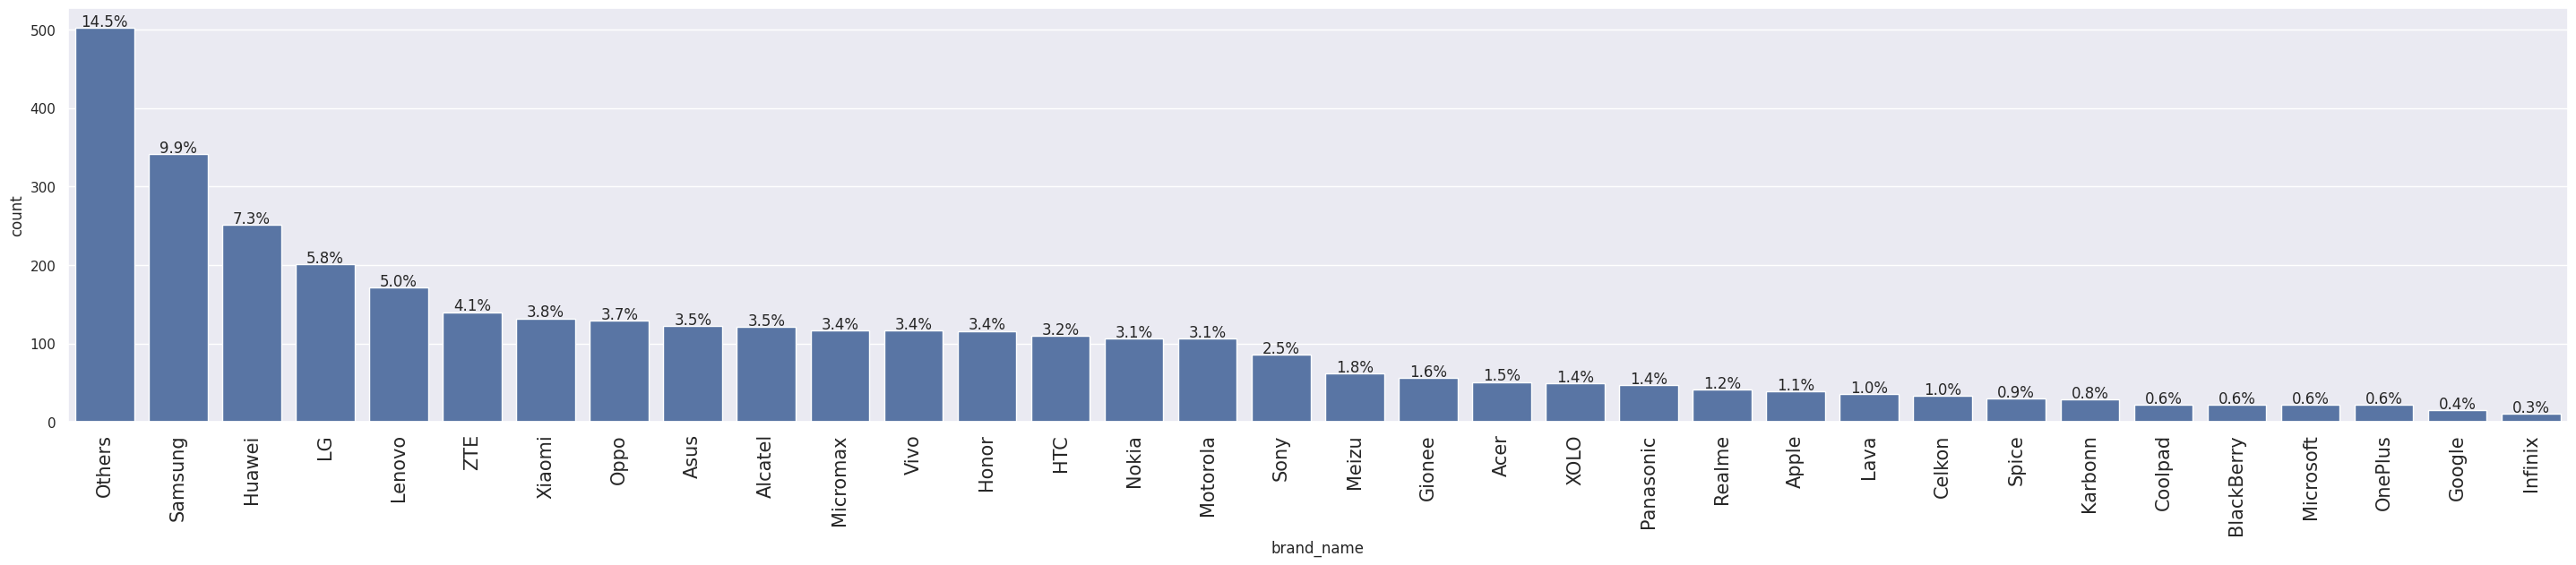

In [ ]:
labeled_barplot(df, "brand_name", perc=True)


- Names of 14.5% of brands could not be identified.

####Visualizing distribution of OS

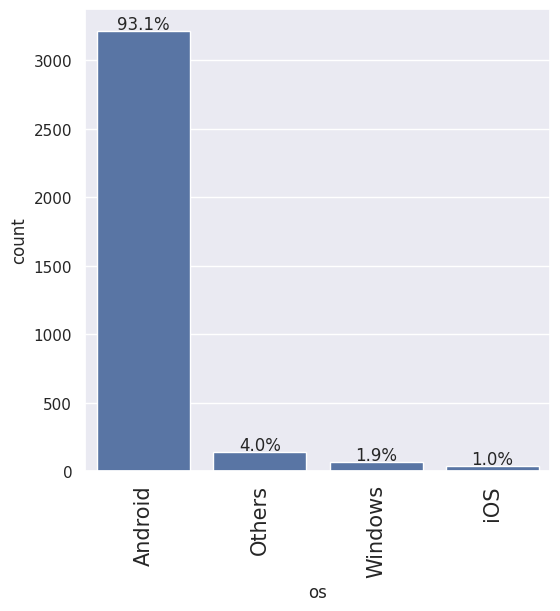

In [ ]:

labeled_barplot(df, "os", perc=True)

- 93% of devices has Android OS.

####Visualization of distribution of 4g phones

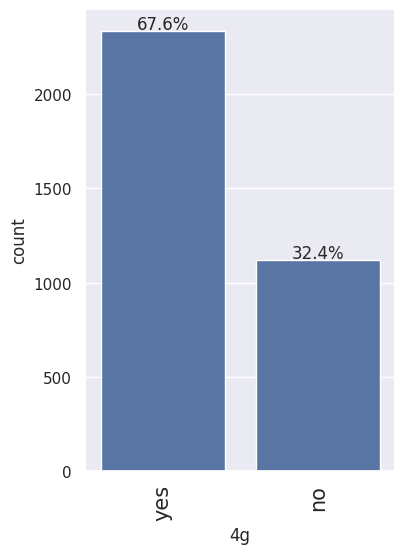

In [ ]:
labeled_barplot(df, "4g", perc=True)

- A larger proportion of devices have 4g.

####Visualization of distribution of 5g phones

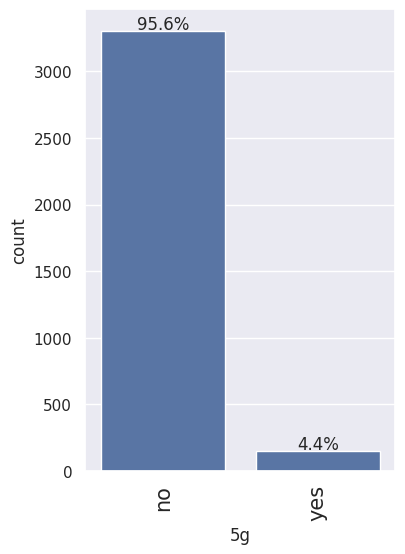

In [ ]:
labeled_barplot(df, "5g", perc=True)

A very large proportion of devices have 5g(95.6%), this is suprising considering its a new technology(launched 2019) and we have phones on the dataset whose release date as far back as 2013.This particular data has to be reviewed further.

####Visualizing distribution of phones according to release_year

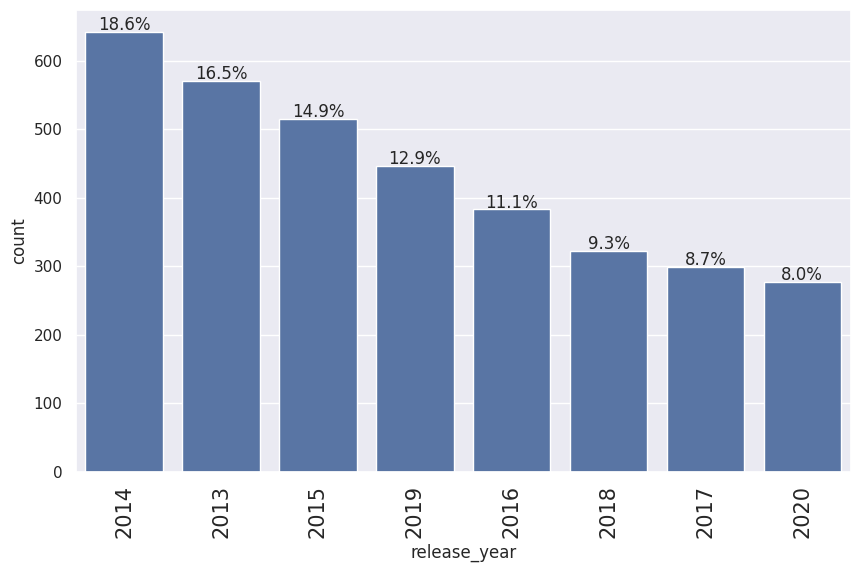

In [ ]:
labeled_barplot(df, "release_year", perc=True)

- The largest proportion of phones were releasd in 2014.

###2. Bivariate analysis

####Numerical variables against each other

Plotting corrolation heatmap of numerical variables

In [ ]:
# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# dropping release year from list of numerical columns as it is not numerical in nature but rather descrete
num_cols.remove("release_year")


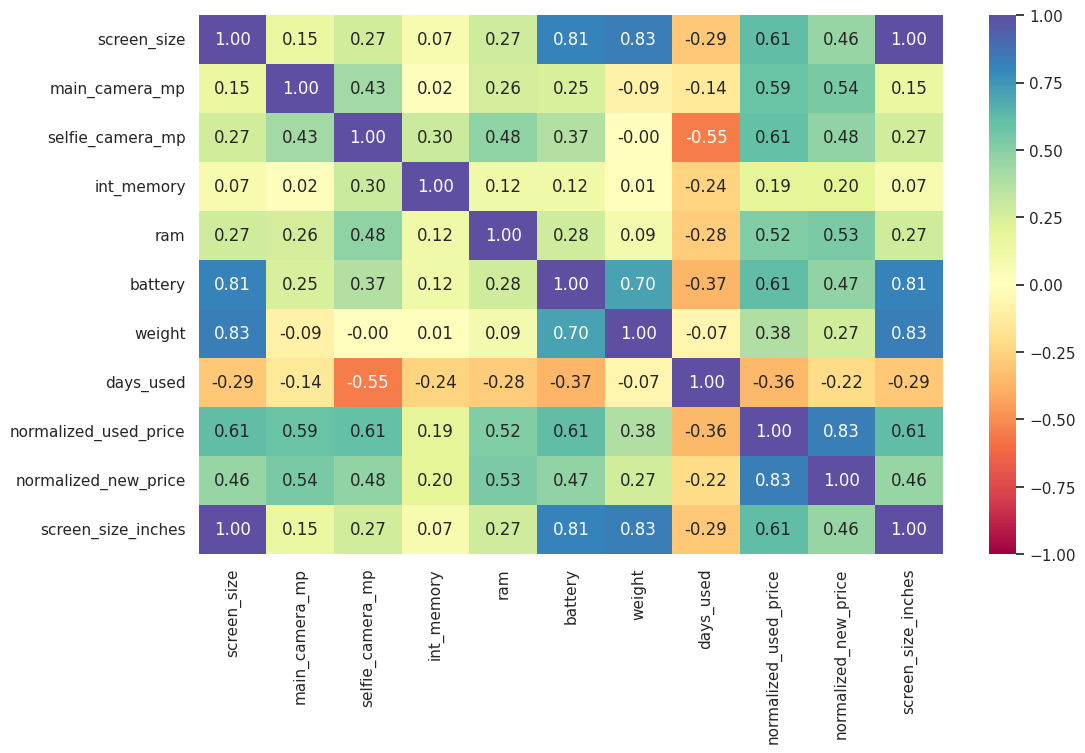

In [ ]:
#plotting correlation heat map
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

plt.show()

**Observations**

- Screen size in inches,Normalized new price,days used,battery,weight, Ram, Selfie camera mp, and main camera carry high correlation with normalized used price. However, normalized new price carry the highest positive correalation whlile days used carry the highest negative correlation with normalized used price.

- Strong positive correlation exist between weight and battery.
- Moderate negative relationship exist between days used and selfie camera mp, which might imply selfie camera enthusiast do not use there phones for too long before getting a new one.


Plotting all numerical variables against each other using a scatterplot

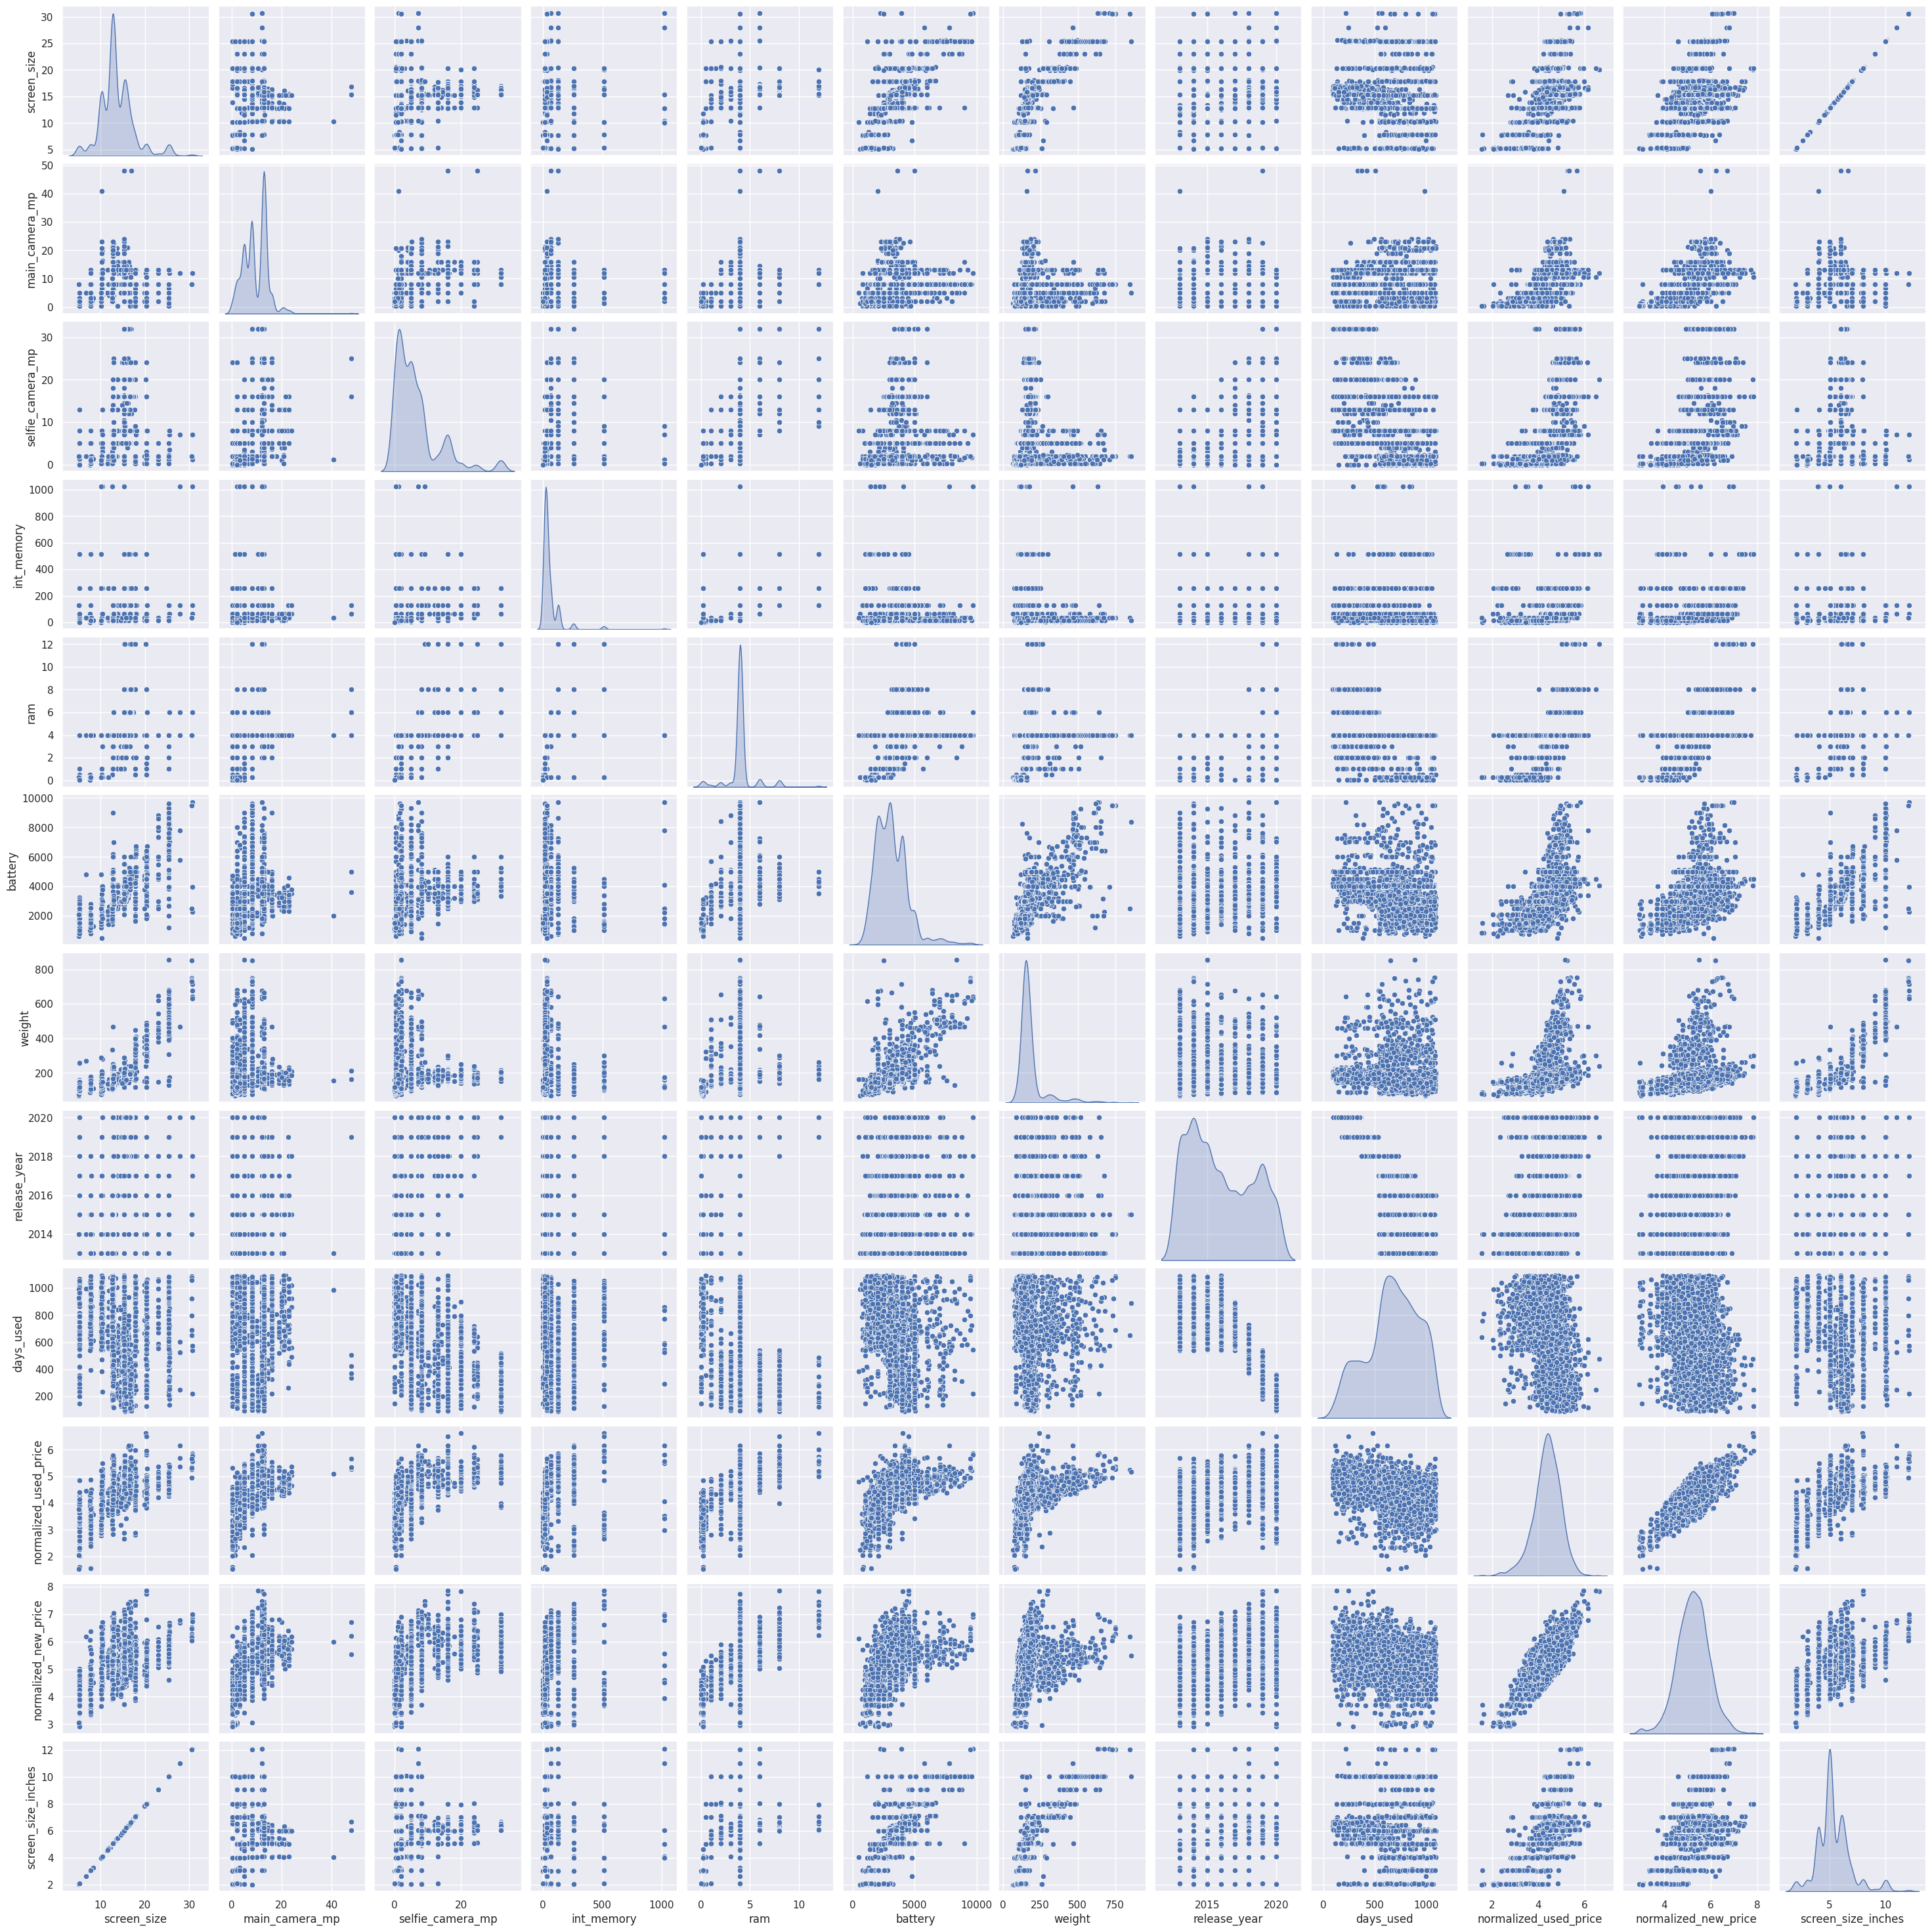

In [ ]:
df_attr = df.iloc[:, 0:7]
sns.pairplot(
    df, diag_kind="kde"
)

- The observation made from the correlation heatmap are visualized here.

#####Relationship between weight and phone with batteries over 4500mAH

####Plotting relationships between categorical and numerical variables

#####Relationship between Ram size and Brand

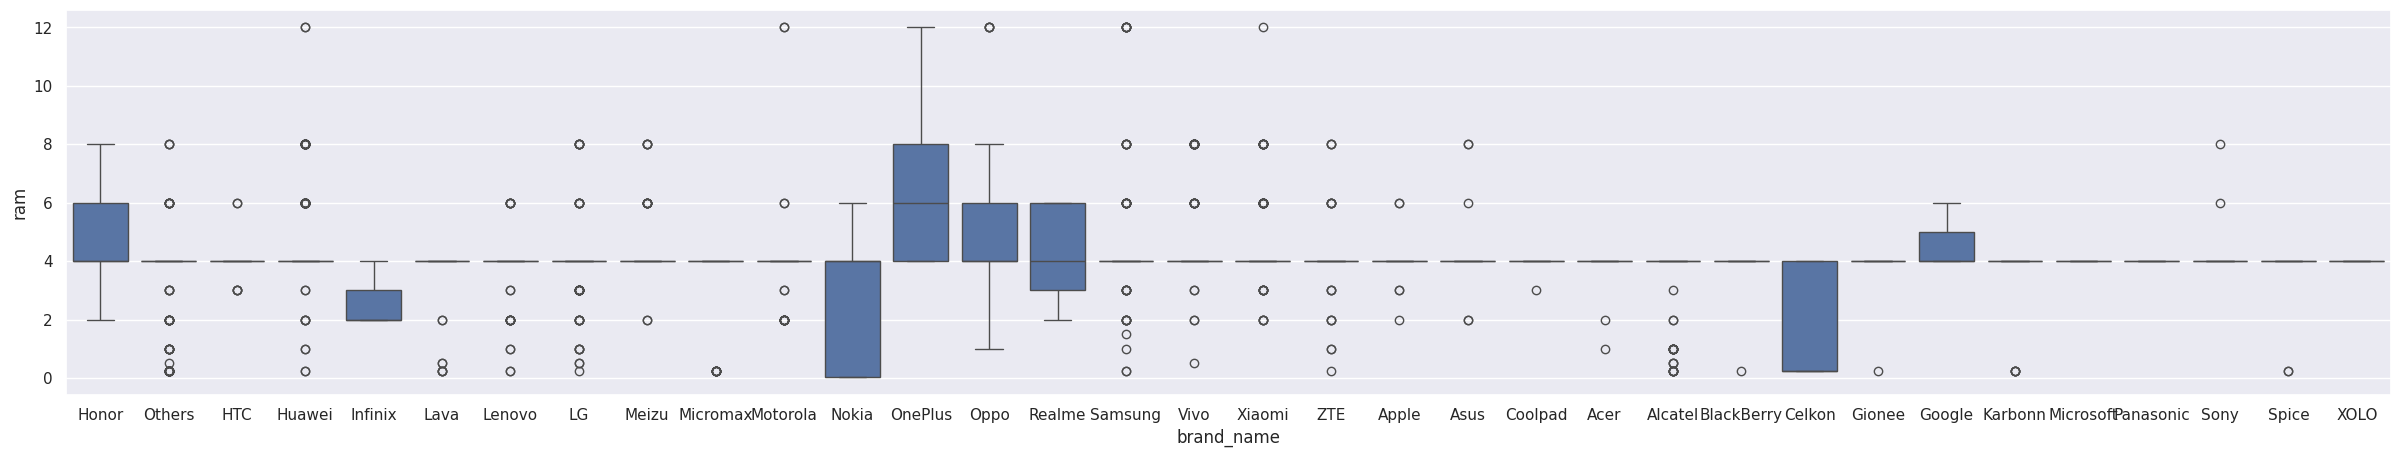

In [ ]:
plt.figure(figsize=(30, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.show()

- OnePLus has the highest average ram of 5gb installed in their devices compared to other brands,while more than 75% OnePlus phones had 8gb of Ram installed.
- Average Ram installed for almost the all brands with exceptions of Oneplus,Infinix,Honor, and Oppo is 4gb
- Infinix devices have the least average RAM installed of 3gb.

#####Relationship between phone brands and screen size in inches

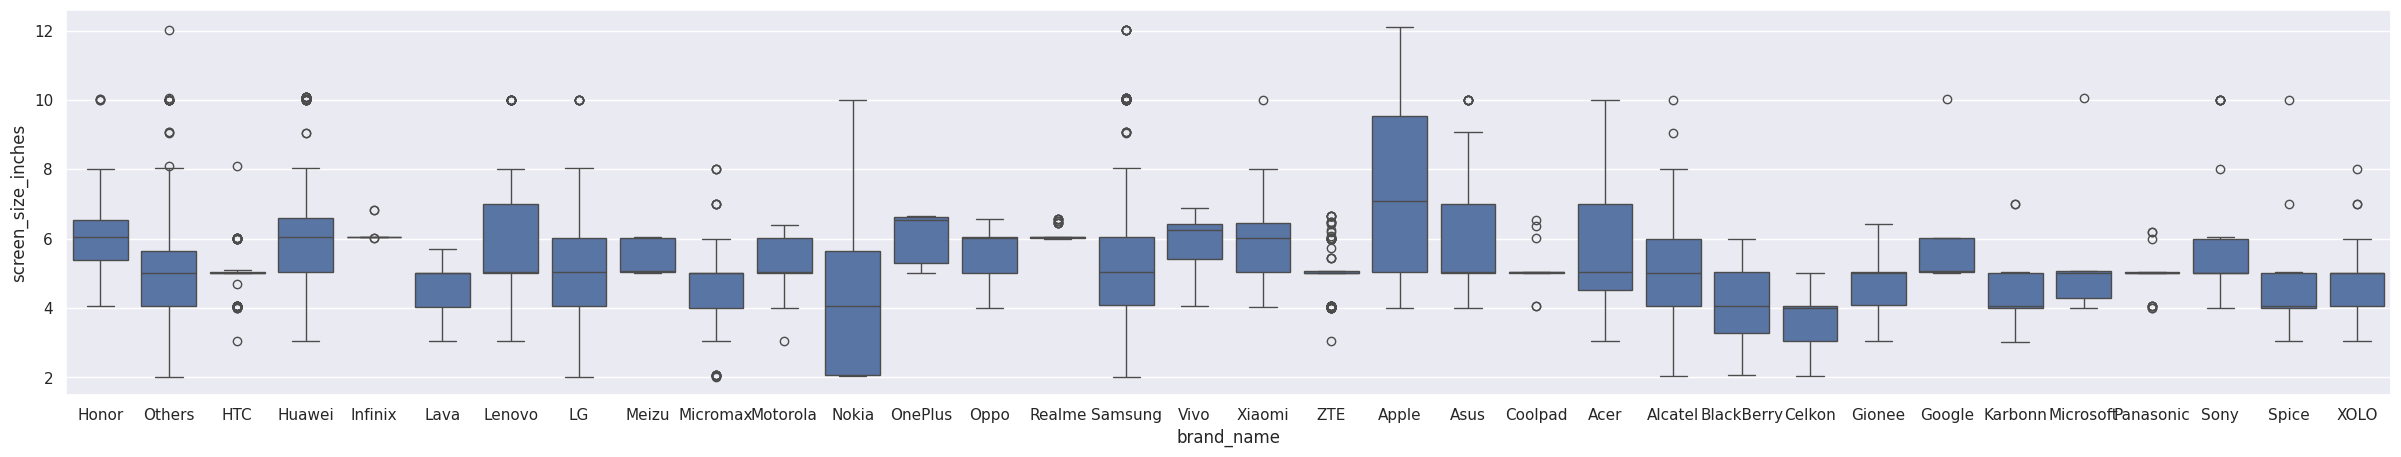

In [ ]:
plt.figure(figsize=(30, 5))
sns.boxplot(data=df, x="brand_name", y="screen_size_inches")
plt.show()

In [ ]:
screen_sizes_over6 = df[df['screen_size_inches'] > 6].shape[0]
print('There are',screen_sizes_over6,'phones over 6 inches accross all brands.')

There are 1228 phones over 6 inches accross all brands.


- Apple devices has the  highest median screen size.

#####Relationship between brand names and selfie camera resolution

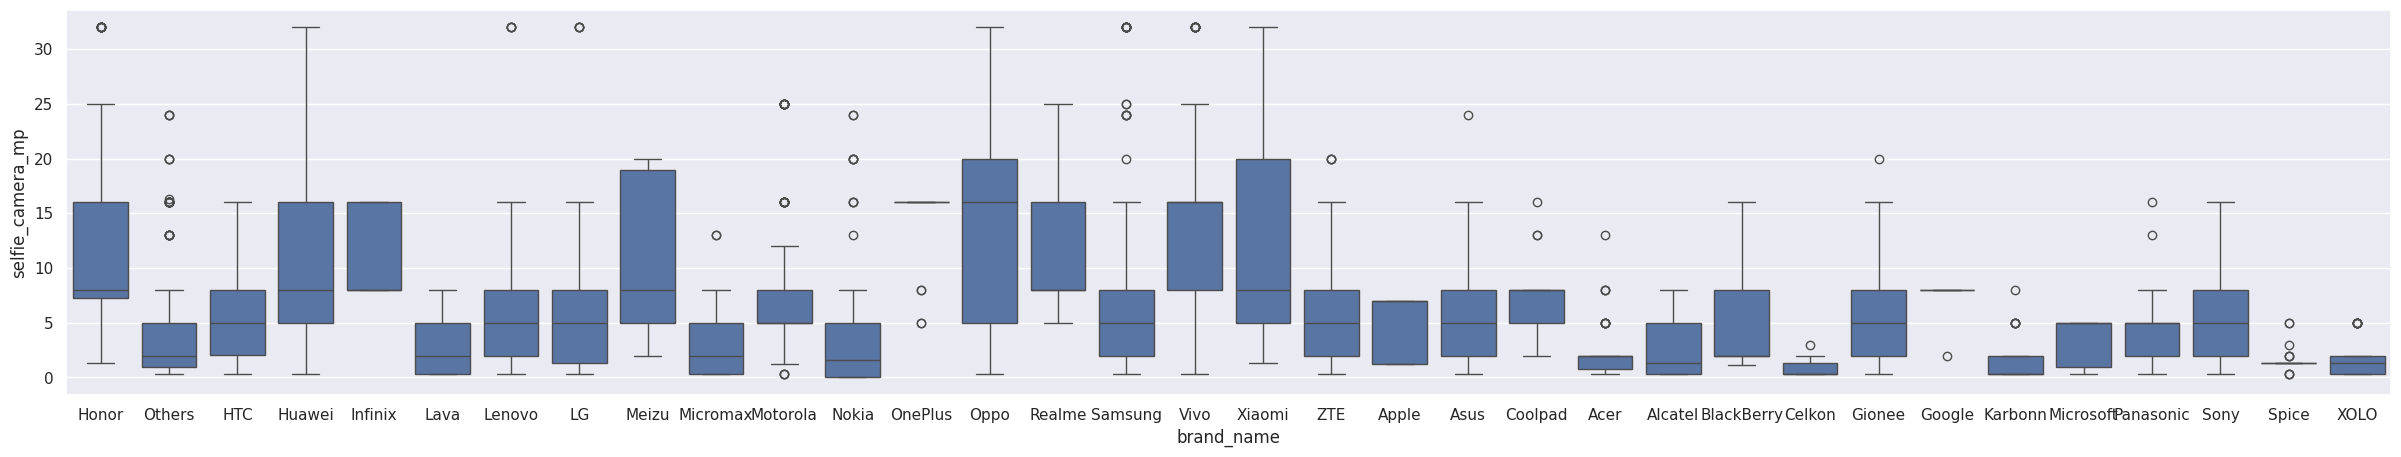

In [ ]:

# Create a boxplot
plt.figure(figsize=(30, 5))
sns.boxplot(data=df, x='brand_name', y='selfie_camera_mp');

- Oppo and OnePlus have the highest median selfie camera mp.

Plotting the distribution of phones with selfie camera over 8mp and different phone brands.

<Axes: xlabel='brand_name', ylabel='selfie_camera_mp'>

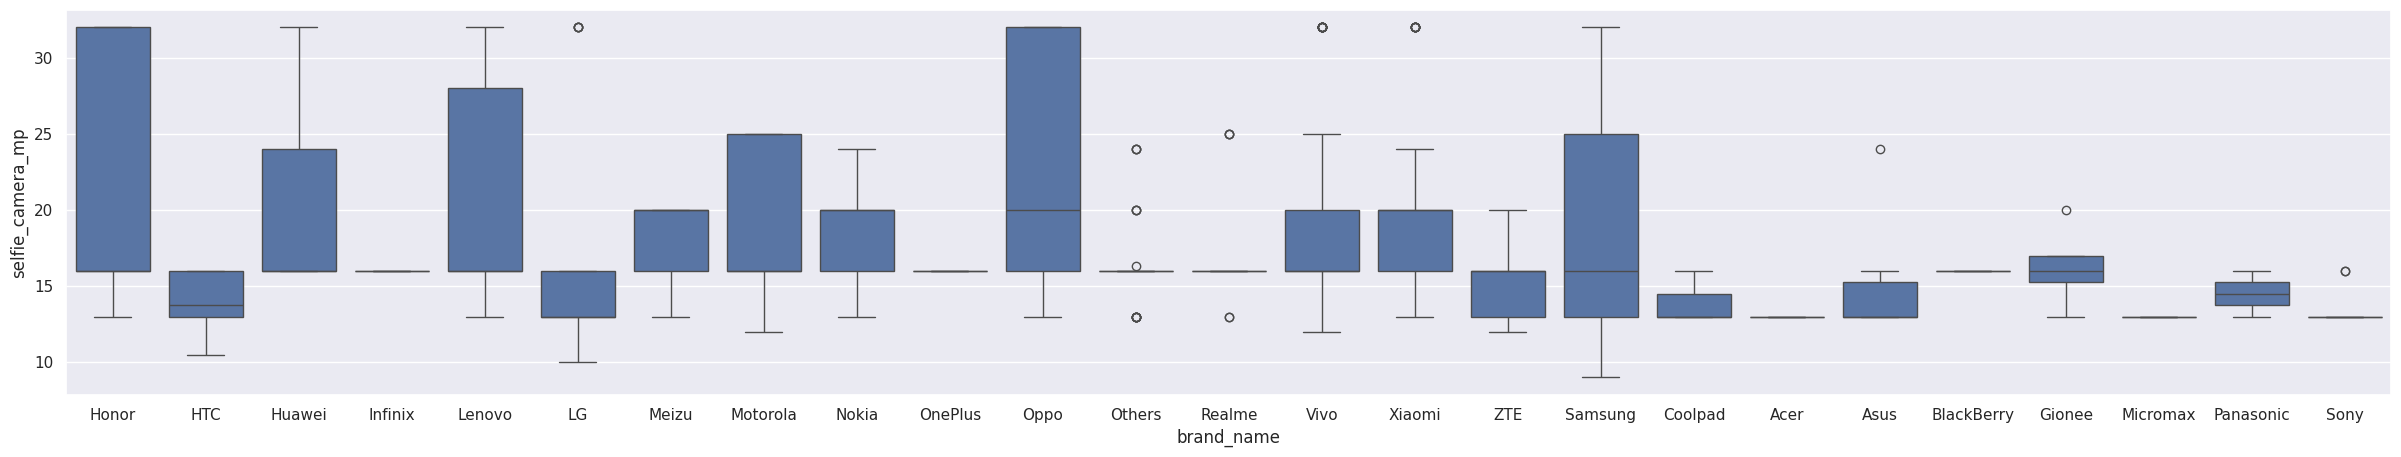

In [ ]:
# Filter the DataFrame for selfie camera resolutions greater than 8MP
selfie_cam_over_8mp_df = df[df['selfie_camera_mp'] > 8]

# Create a boxplot
plt.figure(figsize=(30, 5))
sns.boxplot(data=selfie_cam_over_8mp_df, x='brand_name', y='selfie_camera_mp')

- The following brands with at least 8mp selfie camera had the largest range of selfie camera mp installed: Honor, Oppo, Samsung,and Lenovo.
- The median selfie camera mp across most brands except Oppo, coolpad, Acer,Asus, Micromax, Panasonic, and Sony is 16MP.
- Acer, Micromax,HTC, and Sony had the lowest median selfie mp.
_ Oppo has the largest median selfie mp installed among all brands.


#####Relationship between brand name and days used.

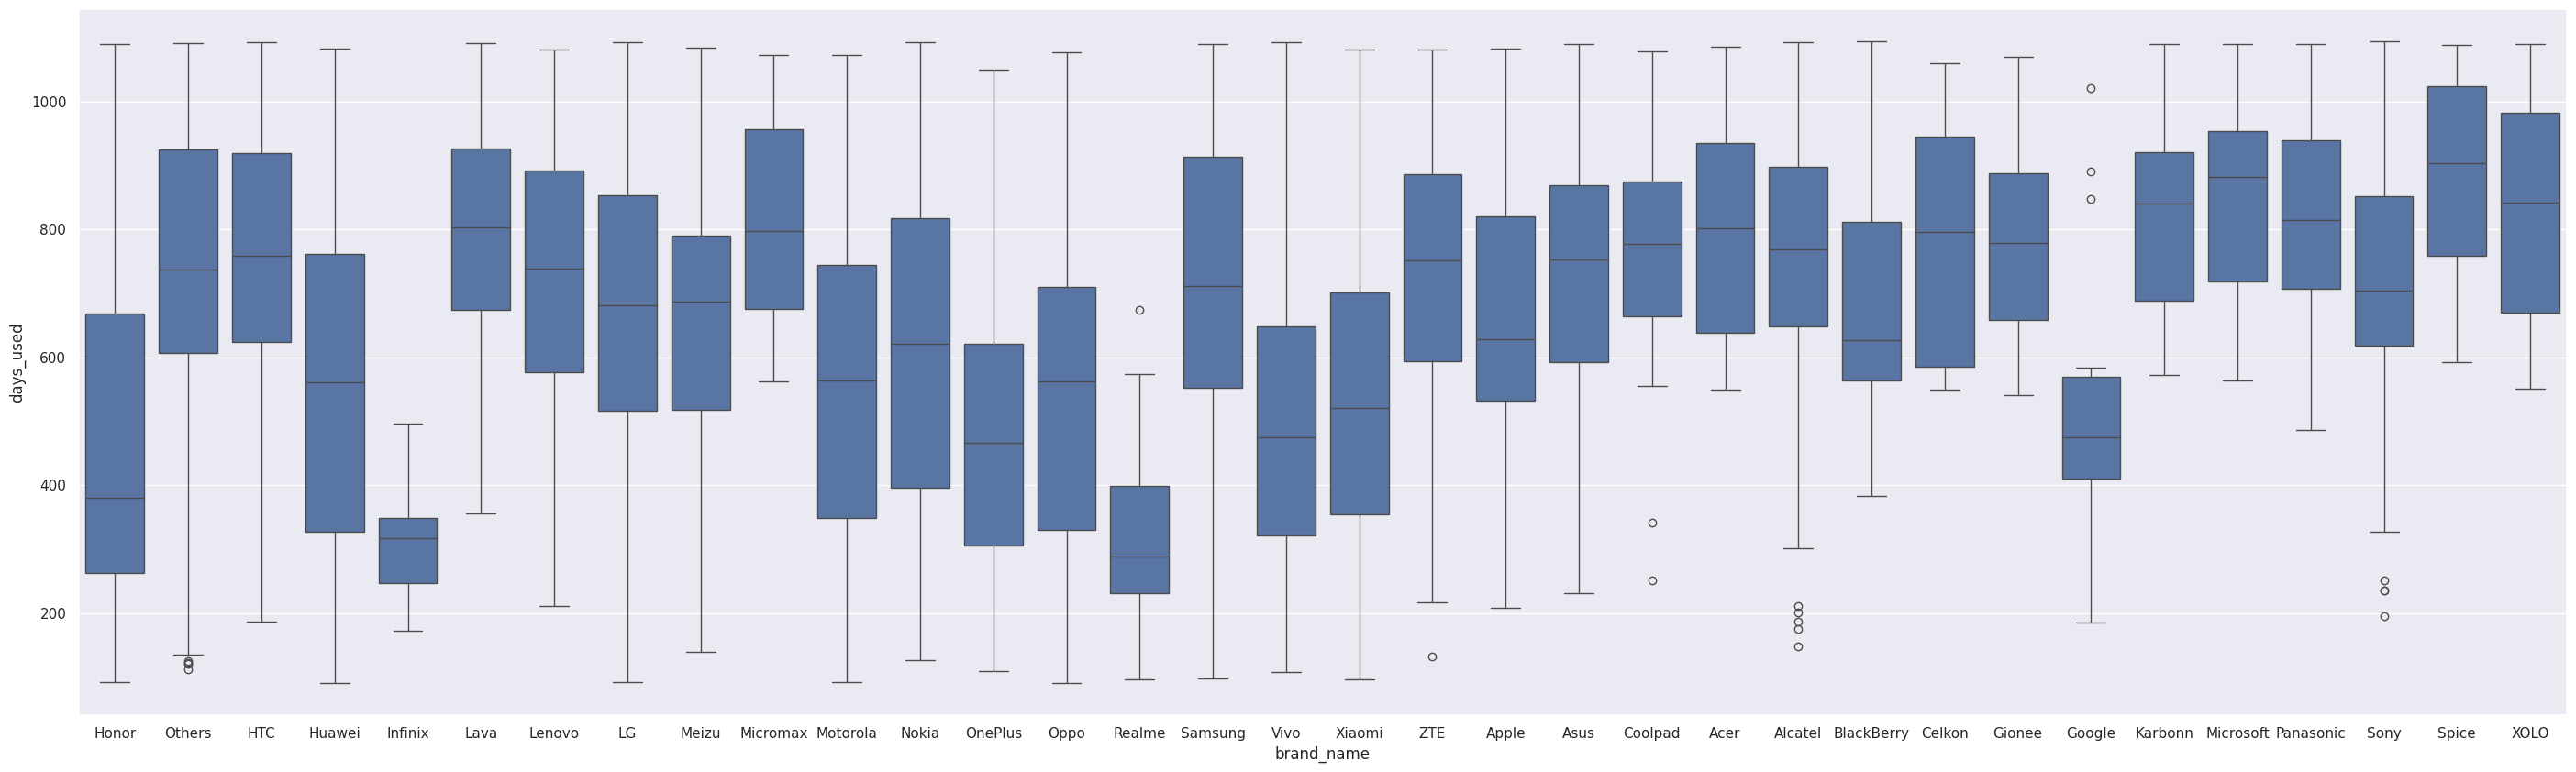

In [ ]:

# Create a boxplot
plt.figure(figsize=(35, 10))
sns.boxplot(data=df, x='brand_name', y='days_used');

- Realme phones has the least median days of usage.
- Spice has the highest median days used.

#####Relationship between brand name and normalized used price

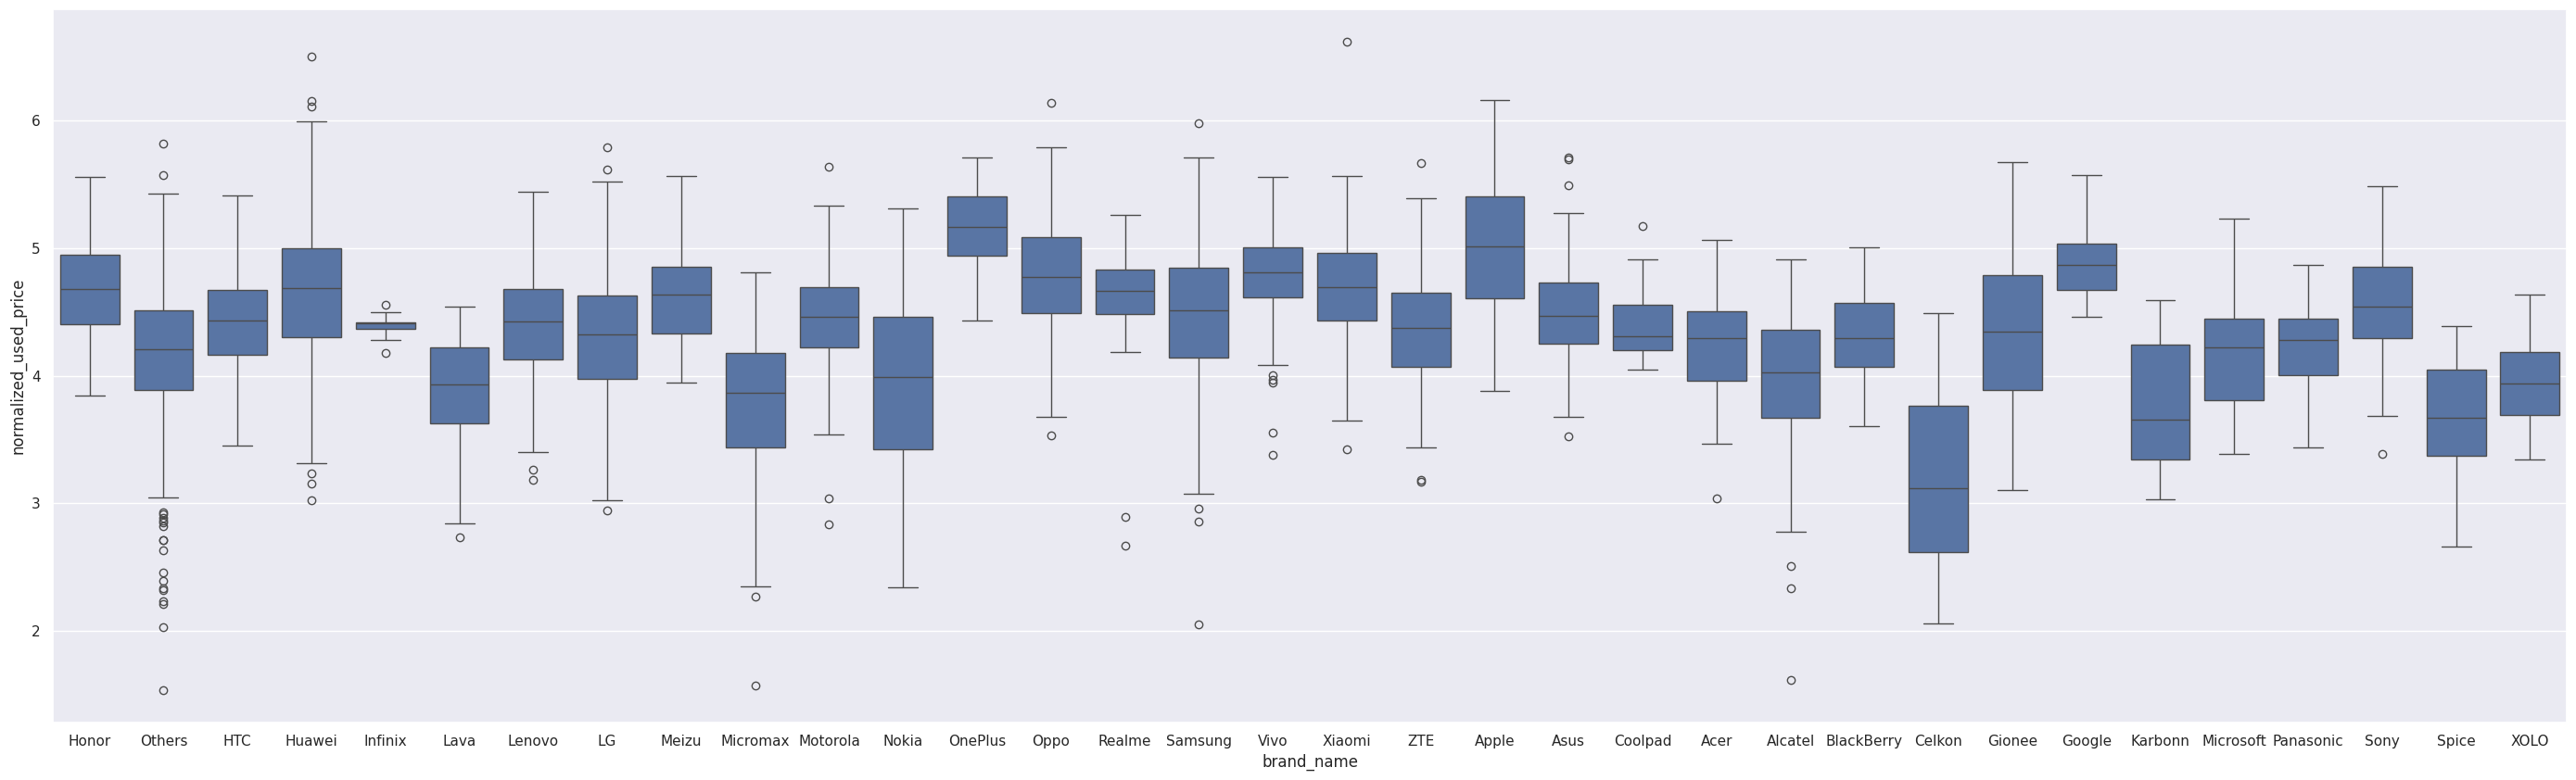

In [ ]:
# Create a boxplot
plt.figure(figsize=(35, 10))
sns.boxplot(data=df, x='brand_name', y='normalized_used_price');

- Apple,OnePlus,and Google ranked the highest in terms of median normalized used price.
- While Ceikon ranked the least in terms of median normalized used price.

#####Relationship between release year and normalized used price

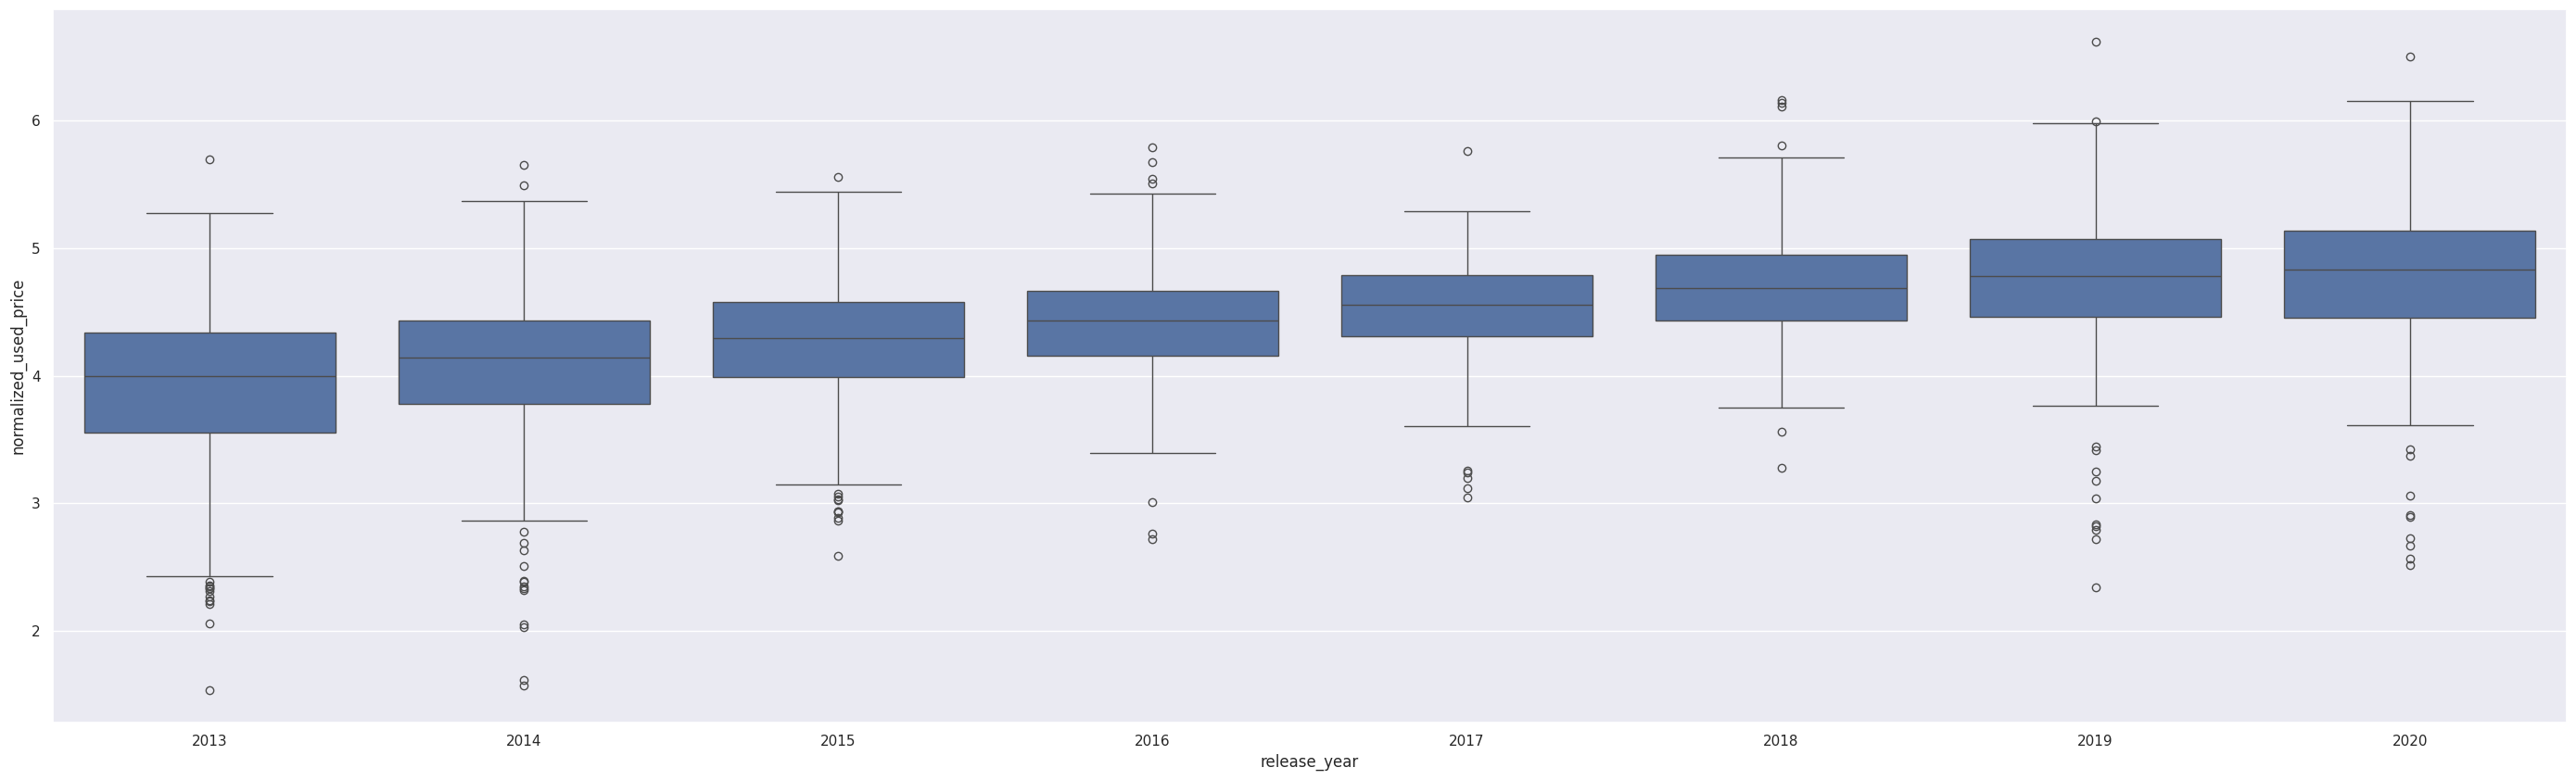

In [ ]:
# Create a boxplot
plt.figure(figsize=(35, 10))
sns.boxplot(data=df, x='release_year', y='normalized_used_price');

- The more recent the device was released, the higher the median normalized used price.

#####Plotting relationship between 5g and selfie camera

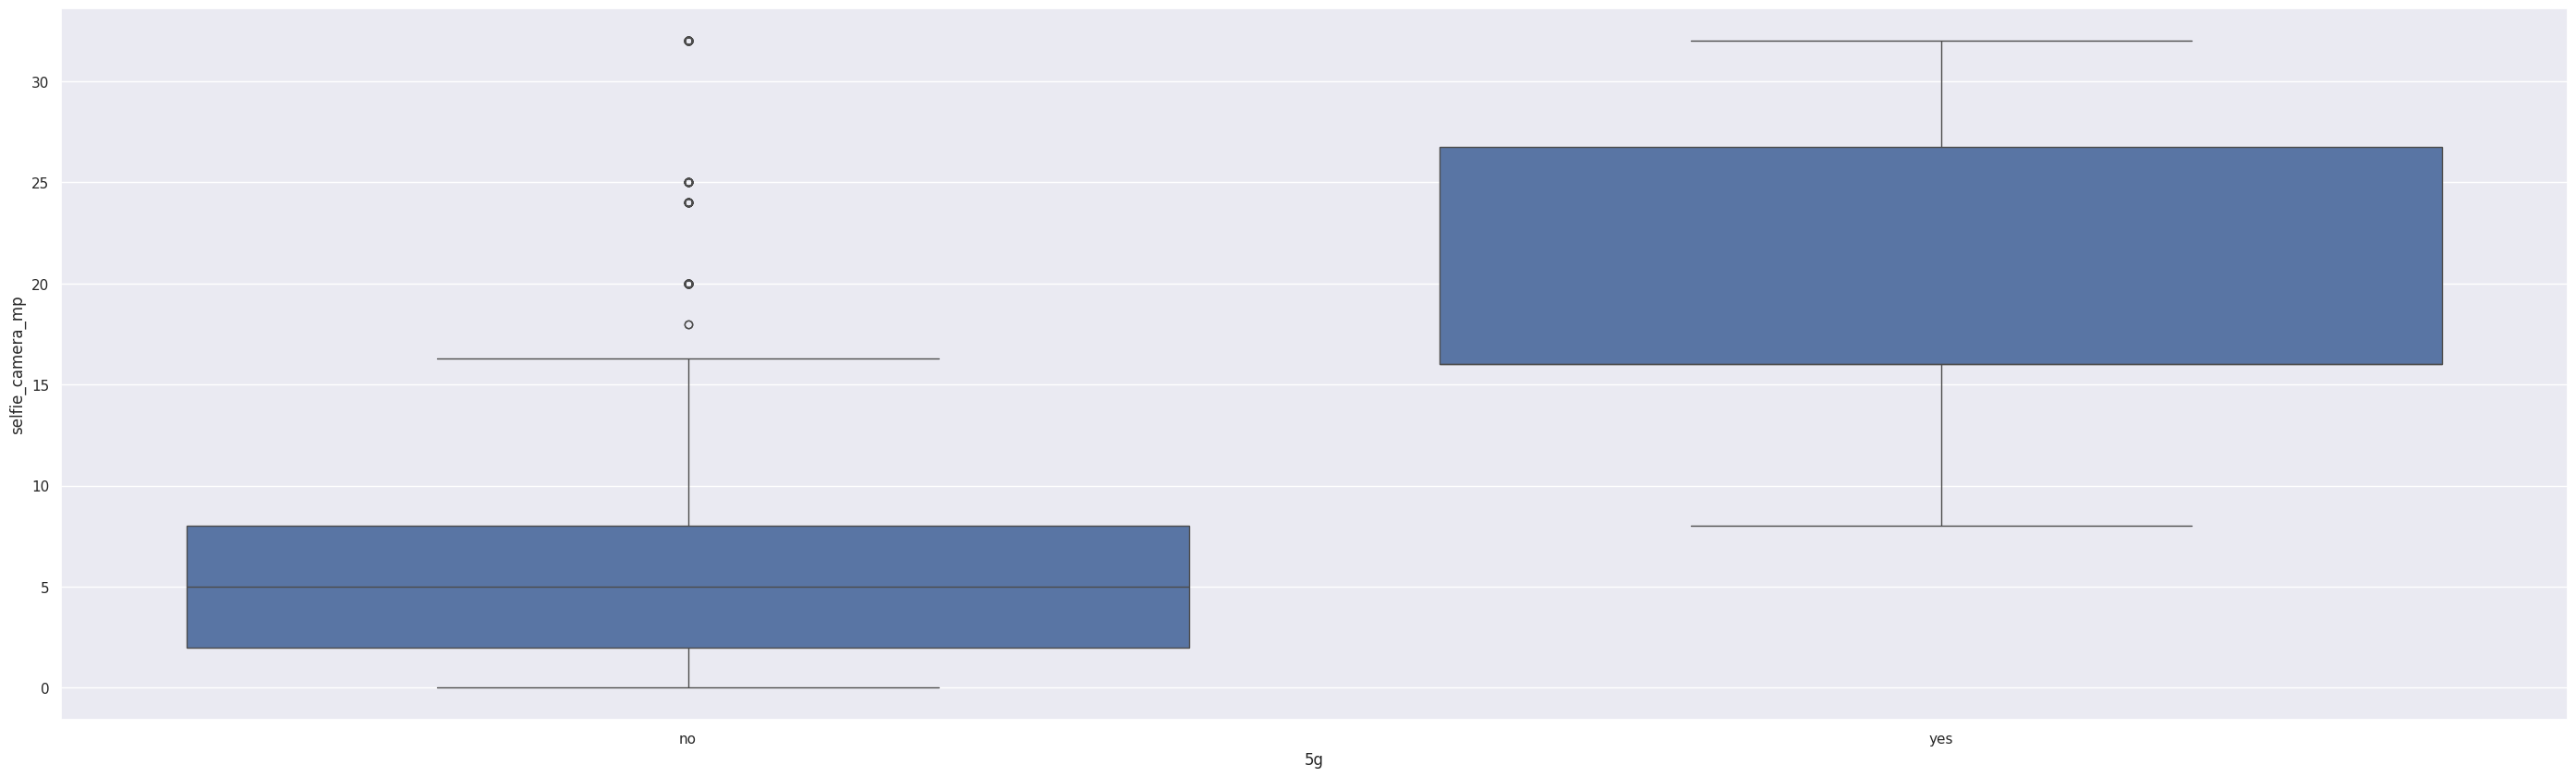

In [ ]:
# Create a boxplot
plt.figure(figsize=(35, 10))
sns.boxplot(data=df, x='5g', y='selfie_camera_mp');

- Devices with larger selfie camera mp were more likely to have 5g.

#####Plotting relationship between 5g and main camera

(0.0, 30.0)

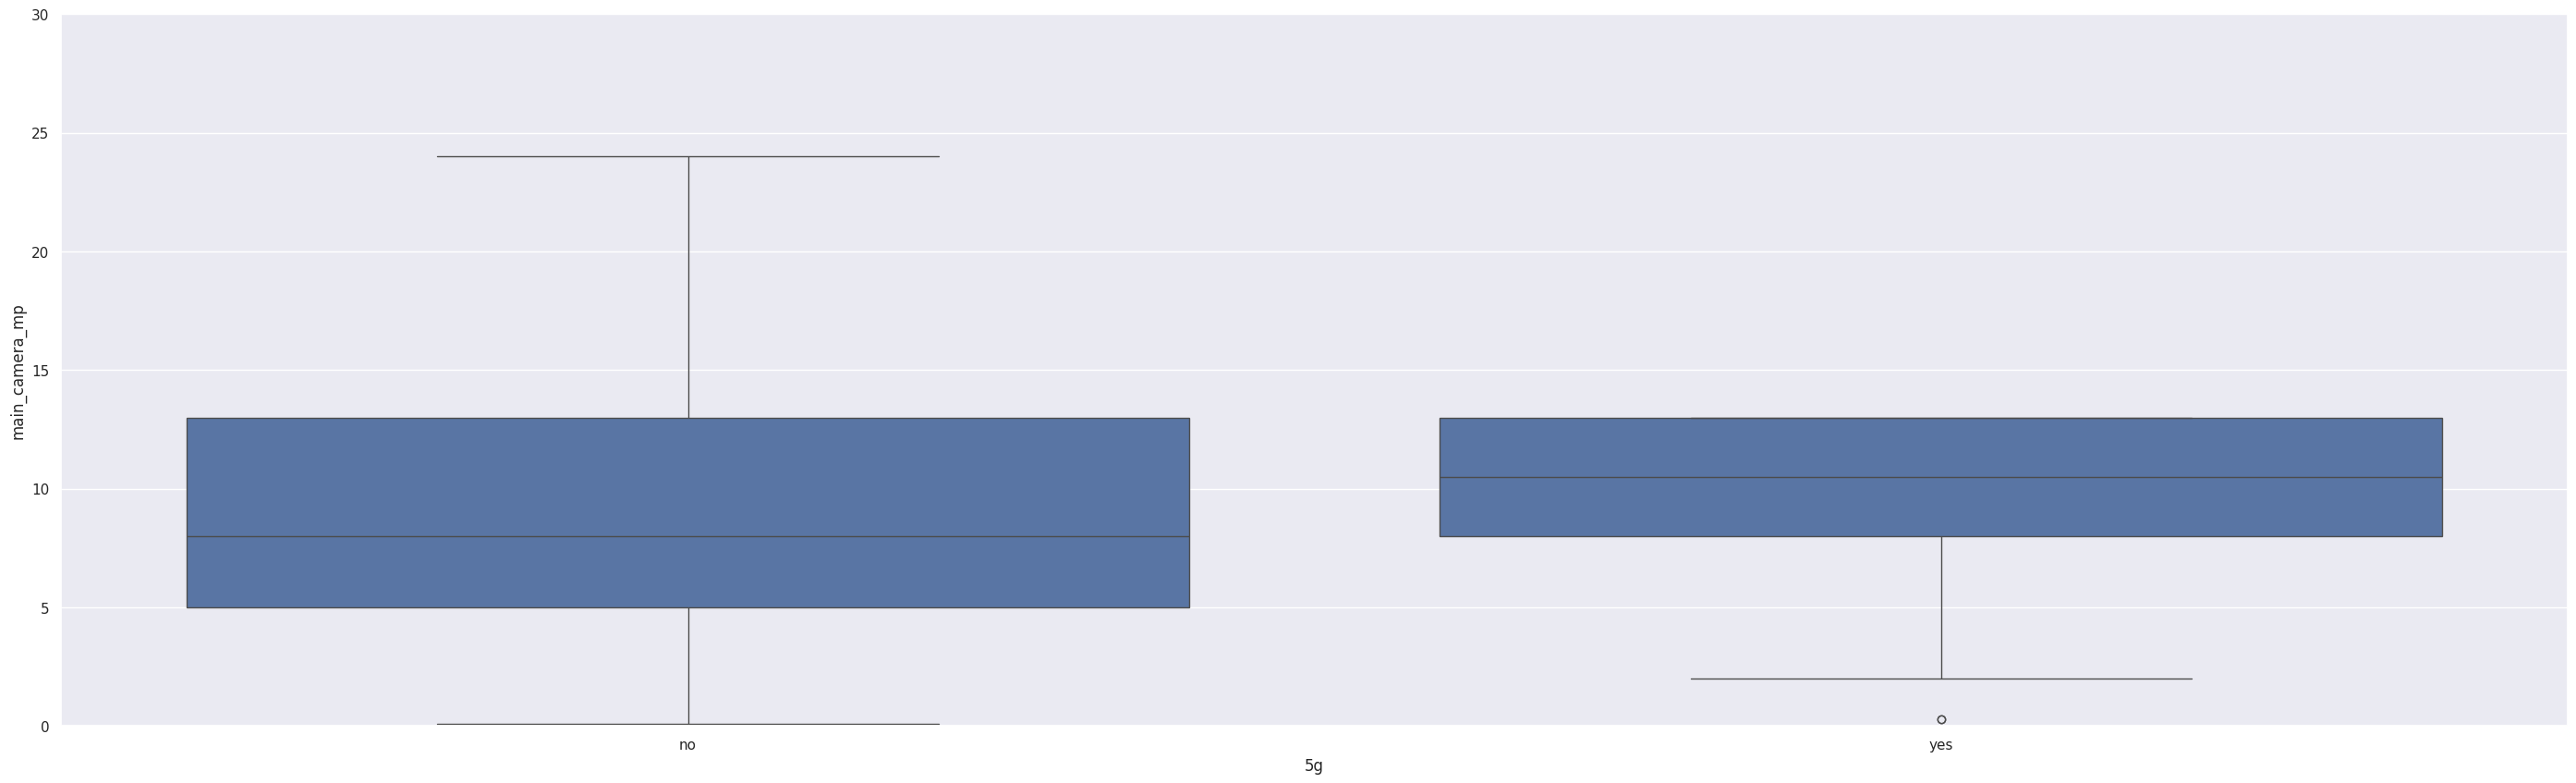

In [ ]:
# Create a boxplot
plt.figure(figsize=(35, 10))
sns.boxplot(data=df, x='5g', y='main_camera_mp')
plt.ylim(0,30)

- Devices with 5g were observed to have slightly higher main camera mp.

Observation

- It is almost immpossible to see 5g phones with main camera less than 2mp, hence its likely the outlier we are seeing there is a data entry error and will be removed during data preprocessing

#####Relationship between internal memory and realease year

<Axes: xlabel='release_year', ylabel='int_memory'>

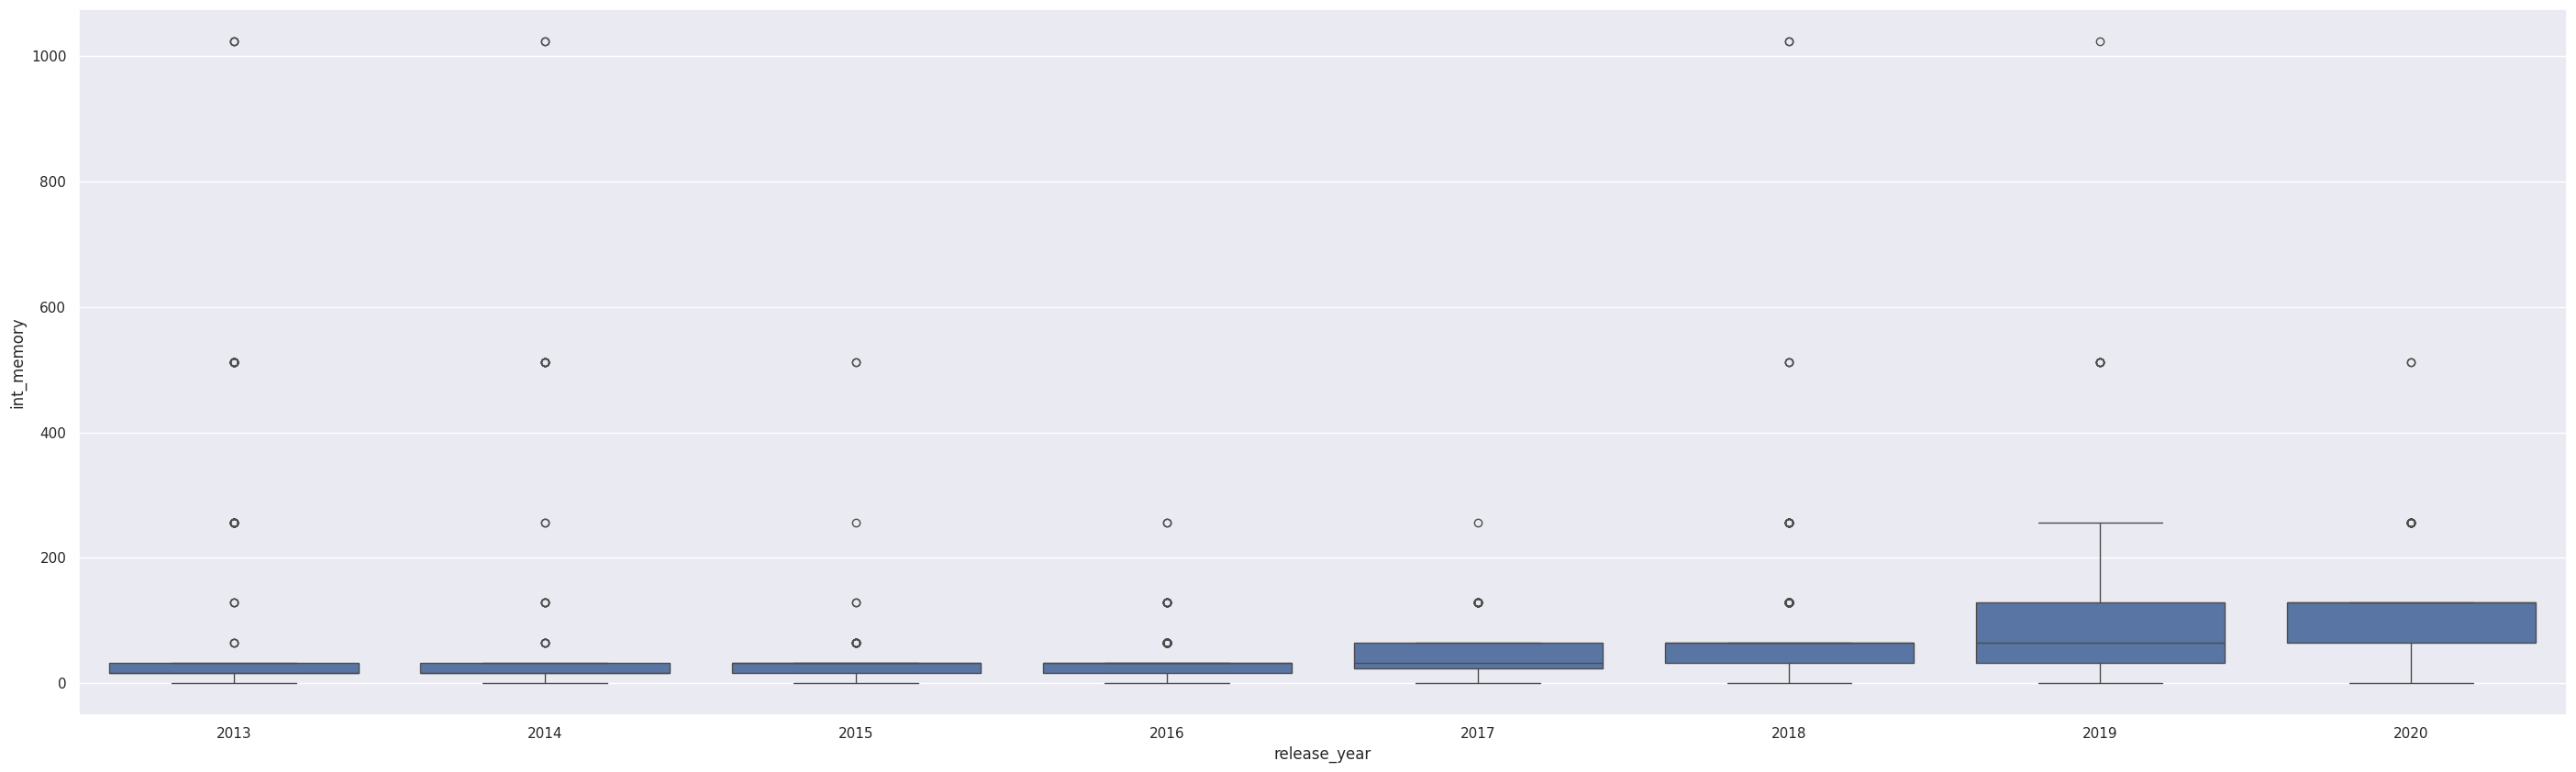

In [ ]:
# Create a boxplot
plt.figure(figsize=(35, 10))
sns.boxplot(data=df,y='int_memory', x='release_year')


- its interesting to have phones released in 2013 that had internal memory as high 500gb to 1tb. Then again, these may be data entry errors.

#####Relationship between Os and battery

<Axes: xlabel='os', ylabel='battery'>

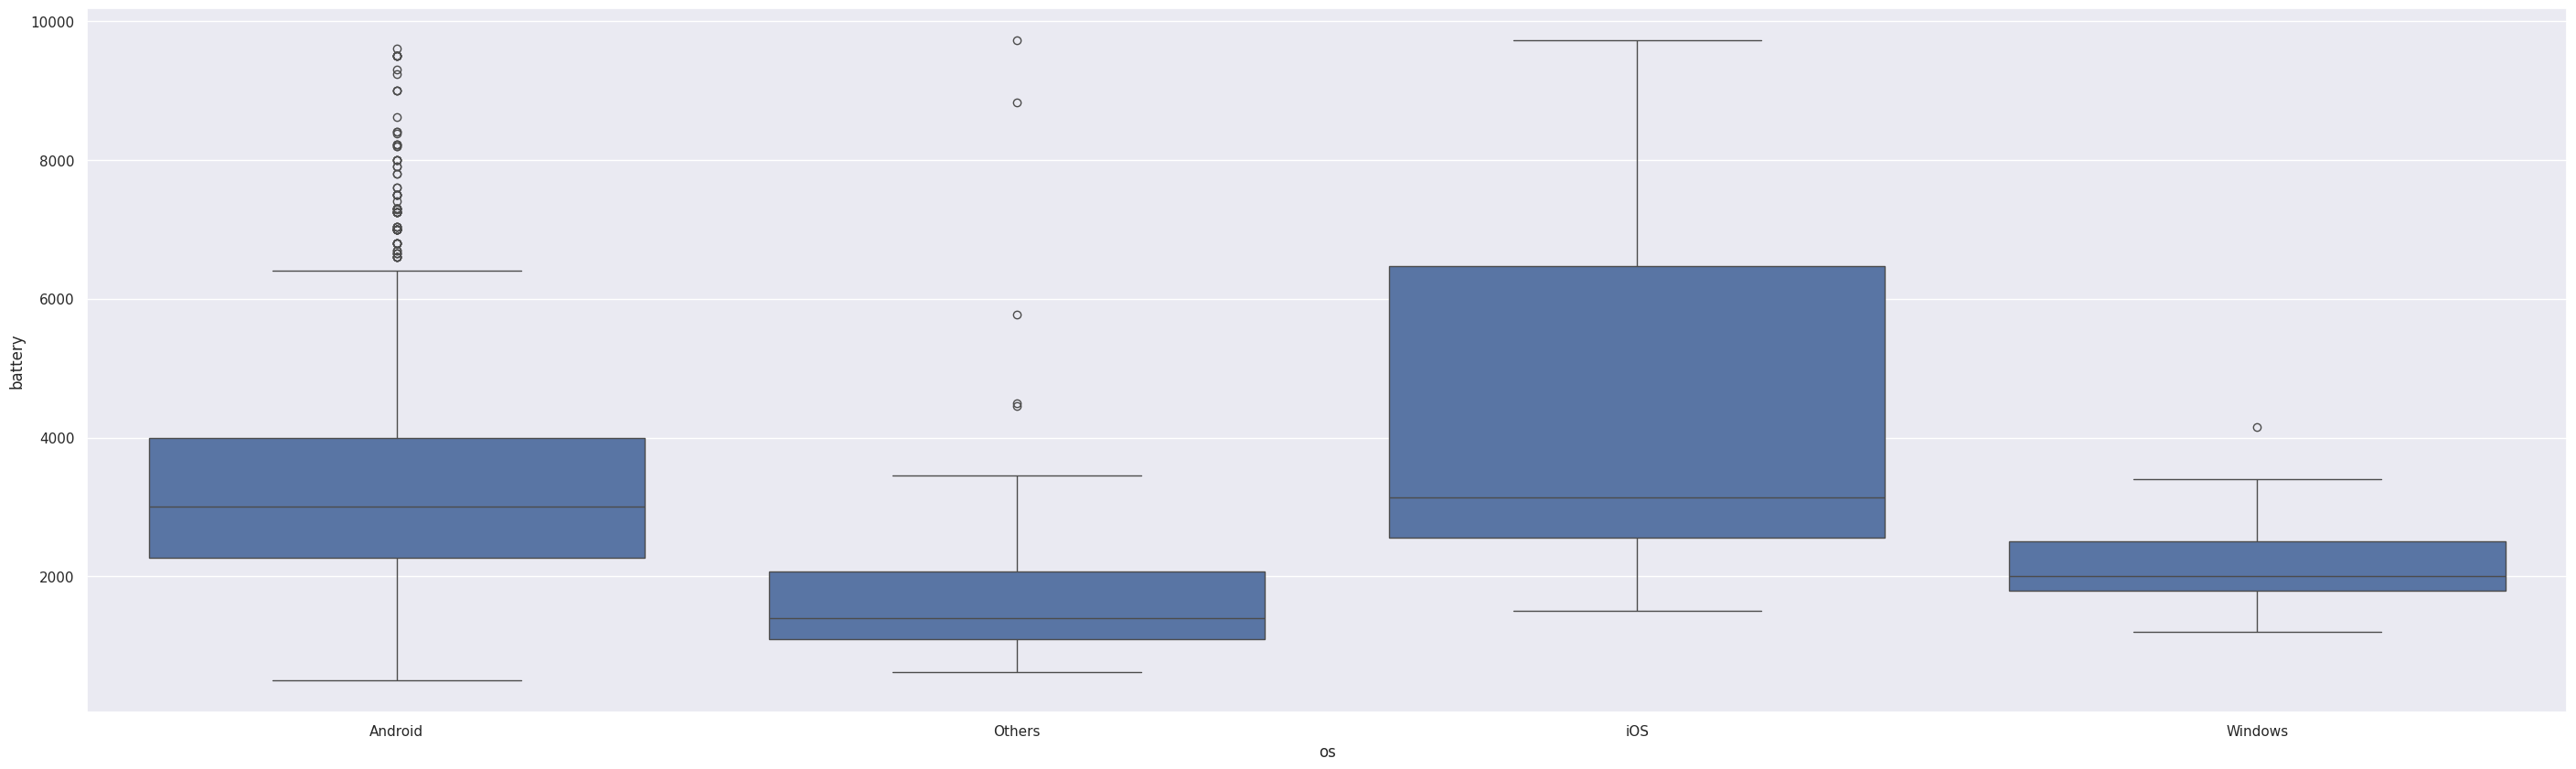

In [ ]:
# Create a boxplot
plt.figure(figsize=(35, 10))
sns.boxplot(data=df,y='battery', x='os')

*IOS devices has wider range of battery capacity compared to the rest,however the median battery capacity is similiar accross OS.


#####Relationship between Brand name and battery

<Axes: xlabel='brand_name', ylabel='battery'>

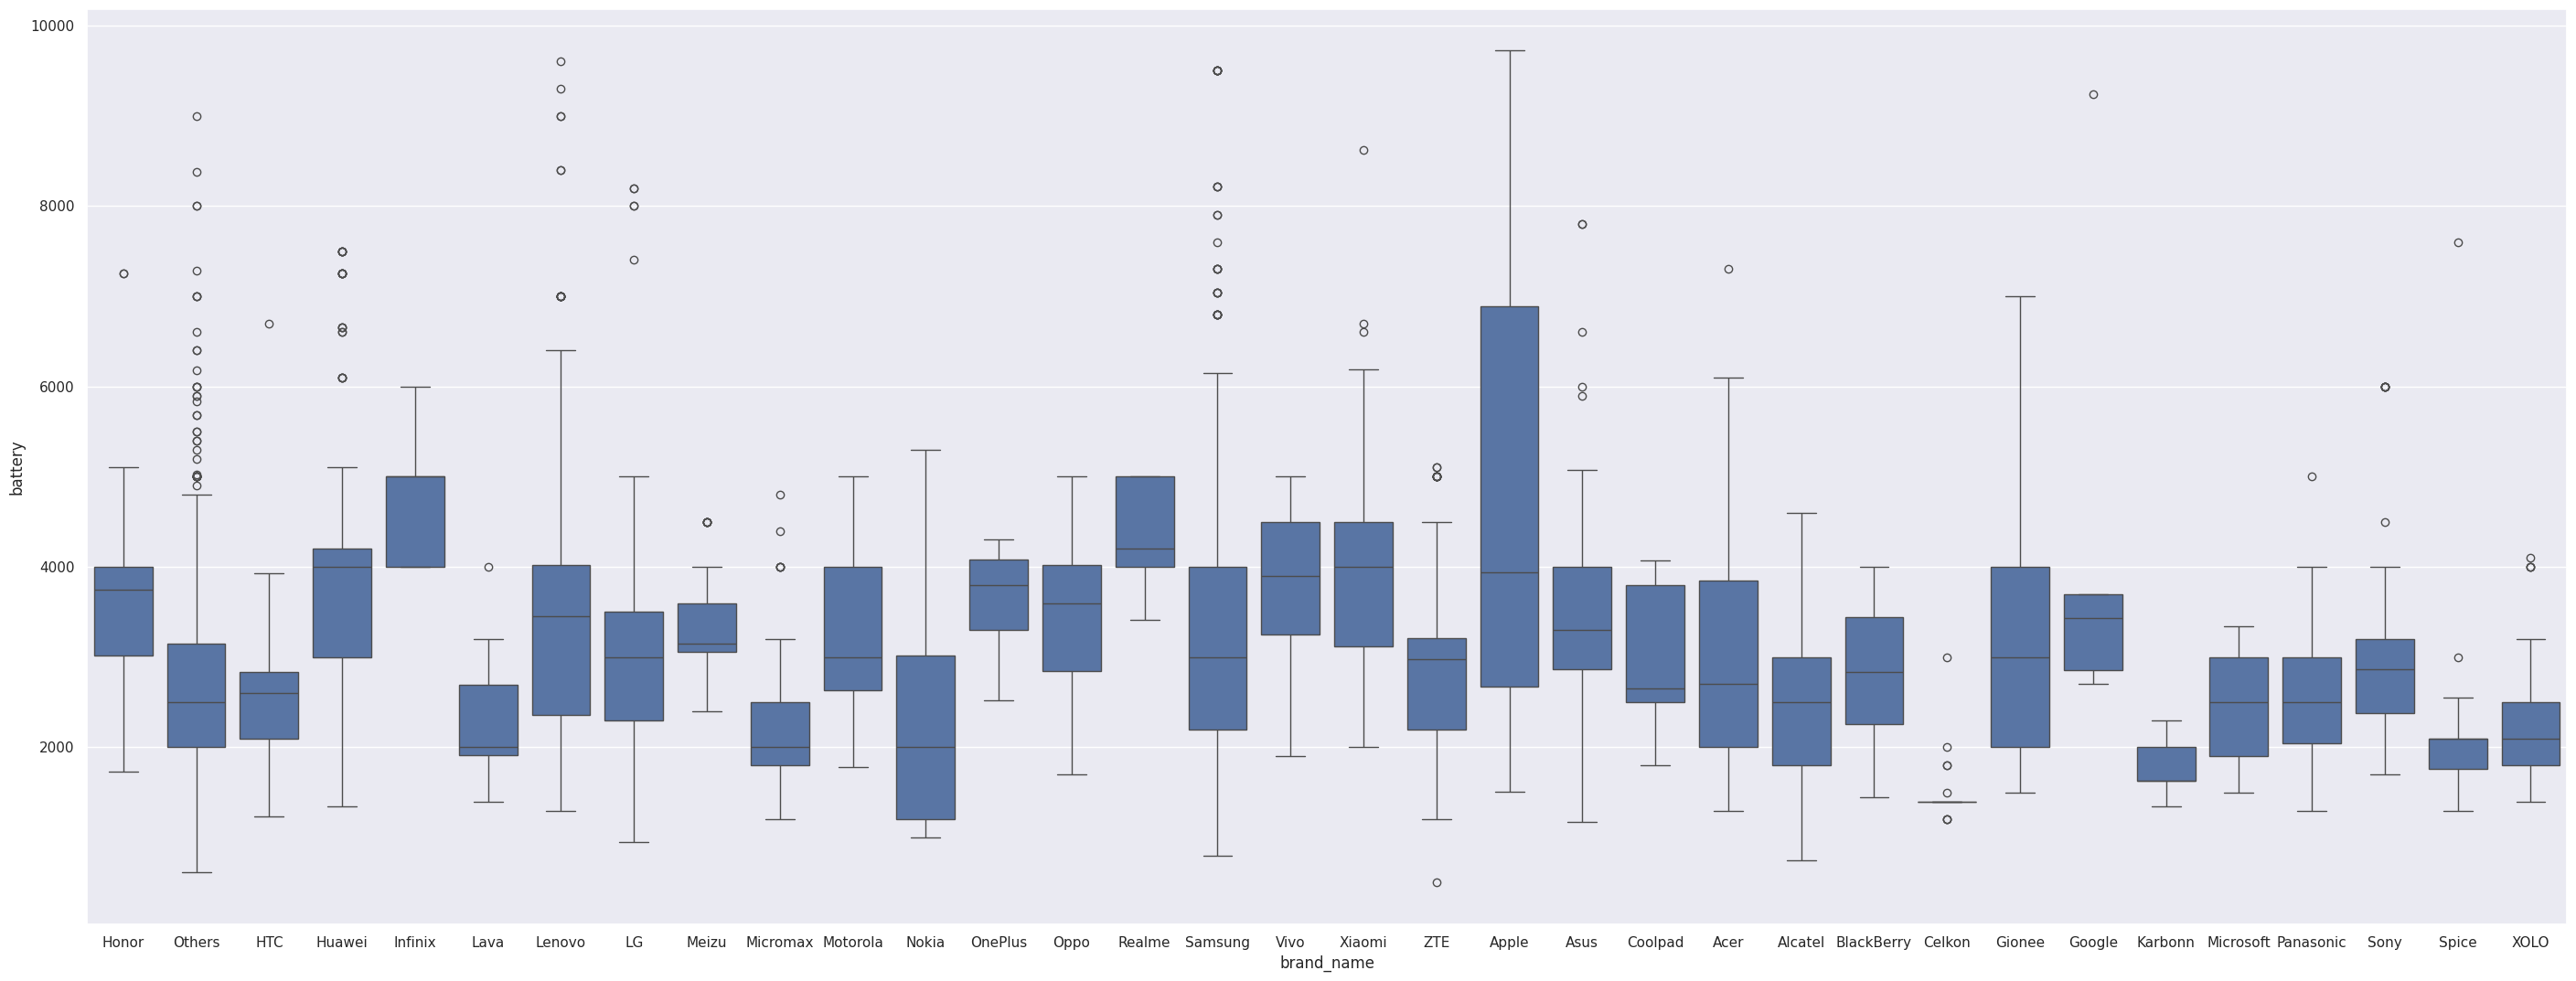

In [ ]:
# Create a boxplot
plt.figure(figsize=(35, 13))
sns.boxplot(data=df,y='battery', x='brand_name')

- Apple devices carry the widest range of battery capacity.

##### Relationship between battery size and weight

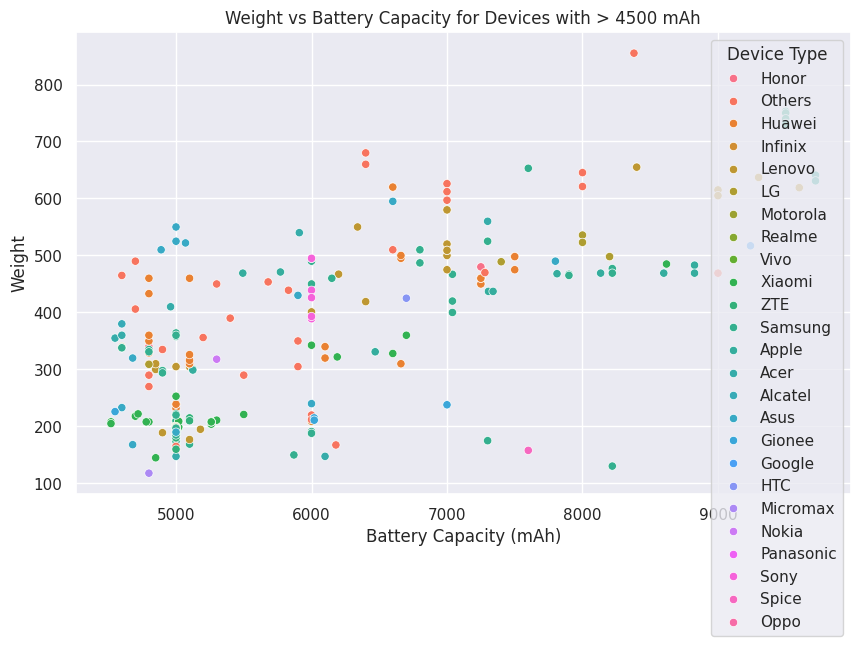

In [150]:



# Filter data for devices with battery capacity > 4500 mAh
large_battery_devices = df[df['battery'] > 4500]

# Create a scatterplot to visualize the relationship between weight and battery capacity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=large_battery_devices, x='battery', y='weight', hue='brand_name')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Weight')
plt.title('Weight vs Battery Capacity for Devices with > 4500 mAh')
plt.legend(title='Device Type')
plt.show()


As visualized, Phones with battery capacities over 4500mah tend to weigh heavier as the weight of the phone increses.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

###**1. Missing value treatment**

In [ ]:
#checking missing values
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
screen_size_inches         0
dtype: int64

we need create a copy of our data set to avoid changes to it

In [ ]:
df1 = df.copy()

####Handling missing data for main_camera_mp variable

- The number of missing data in the main camera mp is less than 10% of the overall data hence will not be wise to remove the entire variable.
- Also, the number of missing value is high enough to contain important details for the model hence treating it by dropping entire rows with missing main camera mp might lead to loss of important info for the regression model.
- Hence, the best way to treat this missing data is by imputing them with the median data of the variable, since the variable is slightly skewwed to the right and the mean will not be ideal for imputing.
- There are also no other variable in the data set that might be related to missing variable here, hence its safe to directly impute without grouping with any other variable.

In [ ]:
#Imputing missing values with median
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())

In [ ]:
#checking missing values
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         2
int_memory               4
ram                      4
battery                  6
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
screen_size_inches       0
dtype: int64

The missing values in main camera mp has been cleared successfully

####Handling missing values for selfie camera mp

- There are just 2 missing value for this variable which will be imputed with the mdedian of the variable since it not normally distributed.
- Also, there are no other variables that directly affect the missing values, so no grouping need before imputing.

In [ ]:
#Imputing missing values with median
df1["selfie_camera_mp"] = df1["selfie_camera_mp"].fillna(df1["selfie_camera_mp"].median())
#checking missing values
df1.isnull().sum()


brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               4
ram                      4
battery                  6
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
screen_size_inches       0
dtype: int64

- Selfie_camera_mp missing values cleared successfully.

#### Handling missing data for Internal memory

1.   List item
2.   List item



- There are just 4 missing value for this variable which will be imputed with the median of the variable since it not normally distributed.
- Also, there are no other variables that directly affect the missing values, so no grouping need before imputing.

In [ ]:
#Imputing missing values with median
df1["int_memory"] = df1["int_memory"].fillna(df1["int_memory"].median())
#checking missing values
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      4
battery                  6
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
screen_size_inches       0
dtype: int64

- Internal memory missing values successfully cleared

####Handling missing values for RAM

- There are just 4 missing value for this variable which will be imputed with the mean of the variable since it is normally distributed.
- Also, there are no other variables that directly affect the missing values, so no grouping need before imputing.

In [ ]:
#Imputing missing values with median
df1["ram"] = df1["ram"].fillna(df1["ram"].mean())
#checking missing values
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  6
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
screen_size_inches       0
dtype: int64

####Handling missing data for battery

- There are just 6 missing value for this variable which will be imputed with the median of the variable since it not normally distributed.
- However, I will be grouping battery with weight before imputing the median value,since heavier phones are expected to have larger battery as seen in the visualization done earlier.
- Then, the remaining missing values will also be imputed with battery median value after been group by OS.

In [ ]:
df1["battery"] = df1["battery"].fillna(
    value=df1.groupby(["weight"])["battery"].transform("median")
)
df1["battery"] = df1["battery"].fillna(
    value=df1.groupby(["os"])["battery"].transform("median")
)
df1.isnull().sum()


brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
screen_size_inches       0
dtype: int64

####Handling missing values for weight

- There are just 7 missing value for this variable which will be imputed with the median of the variable since it not normally distributed.
- However, I will be grouping weight by battery before imputing the median value,since heavier phones are expected to have larger battery as seen in the visualization done earlier.
- Then, the remaining missing values will also be imputed with weight median value after been group by OS.

In [ ]:
df1["weight"] = df1["weight"].fillna(
    value=df1.groupby(["battery"])["weight"].transform("median")
)
df1["weight"] = df1["weight"].fillna(
    value=df1.groupby(["os"])["weight"].transform("median")
)
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
screen_size_inches       0
dtype: int64

Weight and all other missing values has been clear, we can then proceed to the next step.

###**2. Feature Engineering**

So to further tune the data set, so it performs well with the linear regression model, the following variables will be transformed:

a. Weight will be converted from grams to kilogram, this will help normalize the data variance and even help with handling the outlier issues in weight.The weight column will then be dropped.

b. Convert screen size from cm to inches to improve interpretability. This has been done earlier during visualization.
Hence I will be focusing on the former.

####Converting Phone weight from gram to Kilogram.

In [ ]:
#Creating copy of data frame
df2=df1.copy()
#create new column for weight in KG
df2['weight_kg']=df1['weight']/1000

#drop weight column
df2.drop(columns=['weight'], inplace=True)

df2.head()



brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no           13.00   
1      Honor  Android        17.30  yes  yes           13.00   
2      Honor  Android        16.69  yes  yes           13.00   
3      Honor  Android        25.50  yes  yes           13.00   
4      Honor  Android        15.32  yes   no           13.00   

   selfie_camera_mp  int_memory  ram  battery  release_year  days_used  \
0              5.00       64.00 3.00  3020.00          2020        127   
1             16.00      128.00 8.00  4300.00          2020        325   
2              8.00      128.00 8.00  4200.00          2020        162   
3              8.00       64.00 6.00  7250.00          2020        345   
4              8.00       64.00 3.00  5000.00          2020        293   

   normalized_used_price  normalized_new_price  screen_size_inches  weight_kg  
0                   4.31                  4.72                5.71       0.15  
1                   5.16                  5.52                6.81       0.21  
2                   5.11                  5.88                6.57       0.21  
3                   5.14                  5.63               10.04       0.48  
4                   4.39                  4.95                6.03       0.18

####Dropping Screen size column because of possible colinearity with screen size inches.

In [ ]:
df2.drop(["screen_size"], axis=1, inplace=True)

In [ ]:
df2.head(3)

brand_name       os   4g   5g  main_camera_mp  selfie_camera_mp  int_memory  \
0      Honor  Android  yes   no           13.00              5.00       64.00   
1      Honor  Android  yes  yes           13.00             16.00      128.00   
2      Honor  Android  yes  yes           13.00              8.00      128.00   

   ram  battery  release_year  days_used  normalized_used_price  \
0 3.00  3020.00          2020        127                   4.31   
1 8.00  4300.00          2020        325                   5.16   
2 8.00  4200.00          2020        162                   5.11   

   normalized_new_price  screen_size_inches  weight_kg  
0                  4.72                5.71       0.15  
1                  5.52                6.81       0.21  
2                  5.88                6.57       0.21

###**3. Outlier detection and treatment**

- Lets first visualize all our outliers

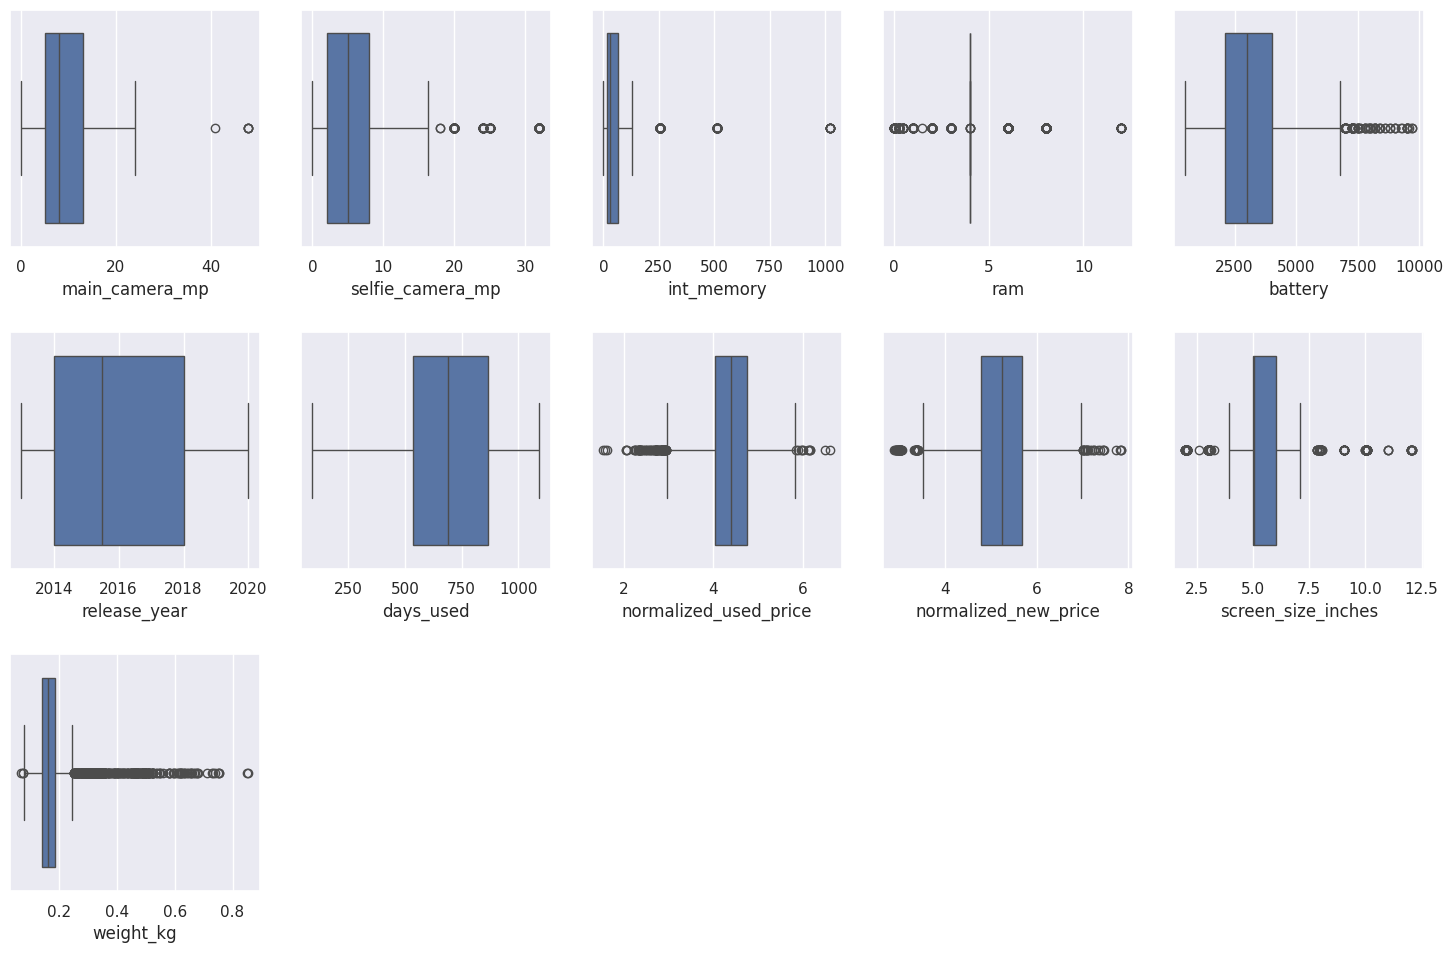

In [ ]:
# outlier detection using boxplot
num_cols = df2.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(data=df2, x=variable)
    plt.tight_layout(pad=2)

plt.show()

- There are a lot of outliers in the data set but will not be dropping them because the are all proper values not errors. The only exception is the variable main camera mp whose outlier are actually errors as mentioned earlier.this outlier will be handled with winsorization method and the original data distribution will be retained.
- We will also be droping the Brand names and Os columns as they contain alot of text which may not be needed in the model.

In [ ]:
# Winsorization using scipy
from scipy.stats.mstats import winsorize
df2["main_camera_mp_winsorized"] = winsorize(df2["main_camera_mp"], limits=[0.01, 0.057])

In [ ]:
#dropping os and brand name columns
df2.drop(["os","brand_name"], axis=1, inplace=True)


In [ ]:
df2.head()

4g   5g  main_camera_mp  selfie_camera_mp  int_memory  ram  battery  \
0  yes   no           13.00              5.00       64.00 3.00  3020.00   
1  yes  yes           13.00             16.00      128.00 8.00  4300.00   
2  yes  yes           13.00              8.00      128.00 8.00  4200.00   
3  yes  yes           13.00              8.00       64.00 6.00  7250.00   
4  yes   no           13.00              8.00       64.00 3.00  5000.00   

   release_year  days_used  normalized_used_price  normalized_new_price  \
0          2020        127                   4.31                  4.72   
1          2020        325                   5.16                  5.52   
2          2020        162                   5.11                  5.88   
3          2020        345                   5.14                  5.63   
4          2020        293                   4.39                  4.95   

   screen_size_inches  weight_kg  main_camera_mp_winsorized  
0                5.71       0.15                      13.00  
1                6.81       0.21                      13.00  
2                6.57       0.21                      13.00  
3               10.04       0.48                      13.00  
4                6.03       0.18                      13.00

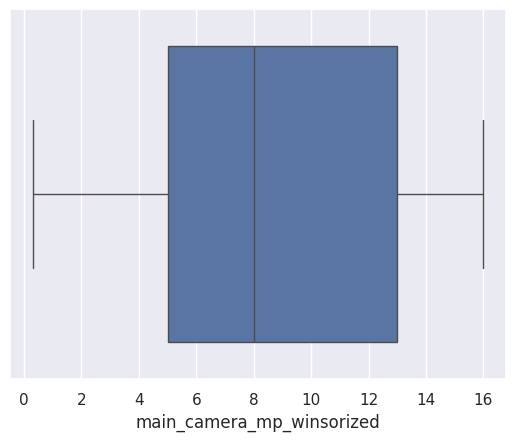

In [ ]:
#visualizing the winsorized main camera mp variable
sns.boxplot(data=df2,x="main_camera_mp_winsorized")
plt.show()

- you can now see the outliers have been eliminated.

###4. **Preparing data for modeling**

- In the sample data set, a prediction of normalized used price of phones is to be done with an ML model.
- We also convert all remaining categorical data to numeric. 4G and 5g column are the only remaining data with string:Yes and No,this will be converted to 1 and 0 respectively.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.
- We will build a Linear Regression model using the train data and then check it's performance after pre processing and a final EDA is done.


#####1. Converting 4g and 5g column variables from Categorical data to numeric data

In [ ]:
#Converting Boolean variables in 4g column to numeric variables
df2['4g'] = df2['4g'].replace({'yes': 1, 'no': 0})
df2['4g'] = df2['4g'].astype(int)

In [ ]:
#Converting Boolean variables in 5g column to numeric variables
df2['5g'] = df2['5g'].replace({'yes': 1, 'no': 0})
df2['5g'] = df2['5g'].astype(int)

In [ ]:
df2.head()

4g  5g  main_camera_mp  selfie_camera_mp  int_memory  ram  battery  \
0   1   0           13.00              5.00       64.00 3.00  3020.00   
1   1   1           13.00             16.00      128.00 8.00  4300.00   
2   1   1           13.00              8.00      128.00 8.00  4200.00   
3   1   1           13.00              8.00       64.00 6.00  7250.00   
4   1   0           13.00              8.00       64.00 3.00  5000.00   

   release_year  days_used  normalized_used_price  normalized_new_price  \
0          2020        127                   4.31                  4.72   
1          2020        325                   5.16                  5.52   
2          2020        162                   5.11                  5.88   
3          2020        345                   5.14                  5.63   
4          2020        293                   4.39                  4.95   

   screen_size_inches  weight_kg  main_camera_mp_winsorized  
0                5.71       0.15                      13.00  
1                6.81       0.21                      13.00  
2                6.57       0.21                      13.00  
3               10.04       0.48                      13.00  
4                6.03       0.18                      13.00

#####2. Spliting final data set to 30 percent train data and 70 percent test data.

In [ ]:
# defining X and y variables

#Independent variable
X = df2.drop(["normalized_used_price"], axis=1)
#Independent variable
y = df2["normalized_used_price"]

print(X.head())
print(y.head())

   4g  5g  main_camera_mp  selfie_camera_mp  int_memory  ram  battery  \
0   1   0           13.00              5.00       64.00 3.00  3020.00   
1   1   1           13.00             16.00      128.00 8.00  4300.00   
2   1   1           13.00              8.00      128.00 8.00  4200.00   
3   1   1           13.00              8.00       64.00 6.00  7250.00   
4   1   0           13.00              8.00       64.00 3.00  5000.00   

   release_year  days_used  normalized_new_price  screen_size_inches  \
0          2020        127                  4.72                5.71   
1          2020        325                  5.52                6.81   
2          2020        162                  5.88                6.57   
3          2020        345                  5.63               10.04   
4          2020        293                  4.95                6.03   

   weight_kg  main_camera_mp_winsorized  
0       0.15                      13.00  
1       0.21                      13.00  
2 

In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

In [ ]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## EDA

- It is a good idea to explore the data once again after manipulating it.
- So, all new feature engineered columns as well as transformed columns will be visualized.

In [ ]:
df2.head()

4g  5g  main_camera_mp  selfie_camera_mp  int_memory  ram  battery  \
0   1   0           13.00              5.00       64.00 3.00  3020.00   
1   1   1           13.00             16.00      128.00 8.00  4300.00   
2   1   1           13.00              8.00      128.00 8.00  4200.00   
3   1   1           13.00              8.00       64.00 6.00  7250.00   
4   1   0           13.00              8.00       64.00 3.00  5000.00   

   release_year  days_used  normalized_used_price  normalized_new_price  \
0          2020        127                   4.31                  4.72   
1          2020        325                   5.16                  5.52   
2          2020        162                   5.11                  5.88   
3          2020        345                   5.14                  5.63   
4          2020        293                   4.39                  4.95   

   screen_size_inches  weight_kg  main_camera_mp_winsorized  
0                5.71       0.15                      13.00  
1                6.81       0.21                      13.00  
2                6.57       0.21                      13.00  
3               10.04       0.48                      13.00  
4                6.03       0.18                      13.00

###**1. Univariate analysis**

Defining a custom function to plot boxplot and histogram together.

In [ ]:
def histogram_boxplot(df2, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df2, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=df2, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=df2, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df2[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram(green line)
    ax_hist2.axvline(
        df2[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram(black line)

Defining a custom function with parameters set to aid plotting a barplot.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def labeled_barplot(df2, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df2[feature])  # length of the column
    count = df2[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df2,
        x=feature,
        order=df2[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

####Distribution of 4g phones

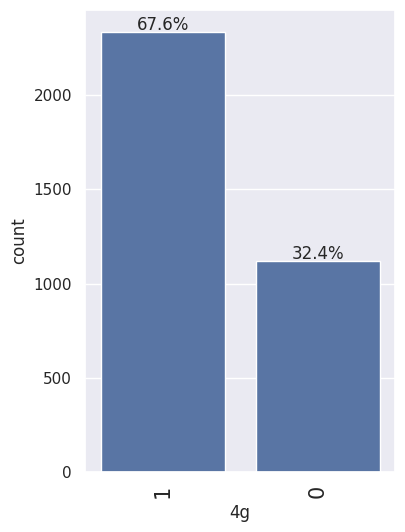

In [ ]:
labeled_barplot(df2, "4g", perc=True)



- No distribution changes expected as seen.

####Distribution of 5G phones

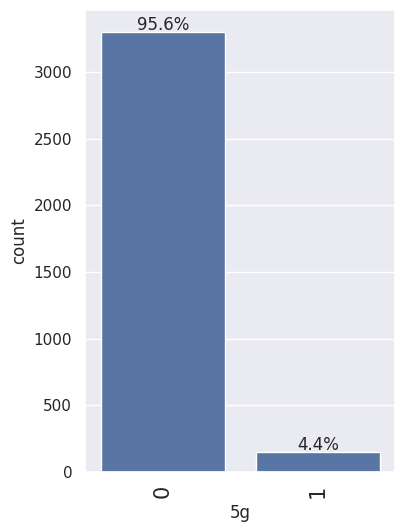

In [ ]:
labeled_barplot(df2, "5g", perc=True)

- No distribution changes expected as seen.

####Distribution of Main_camera Mp and Main_Mp_Windsorized

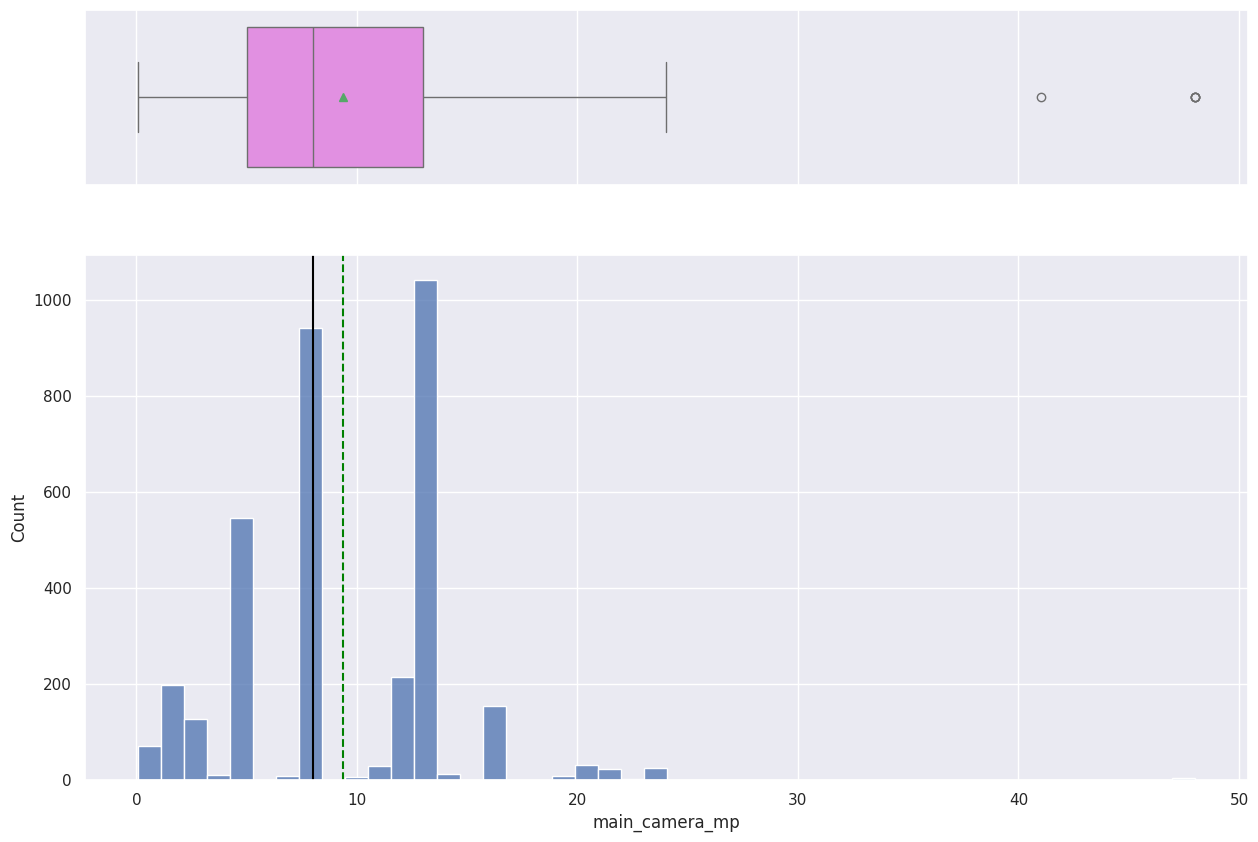

In [ ]:
#plot distribution of main camera mp
histogram_boxplot(df2, "main_camera_mp")

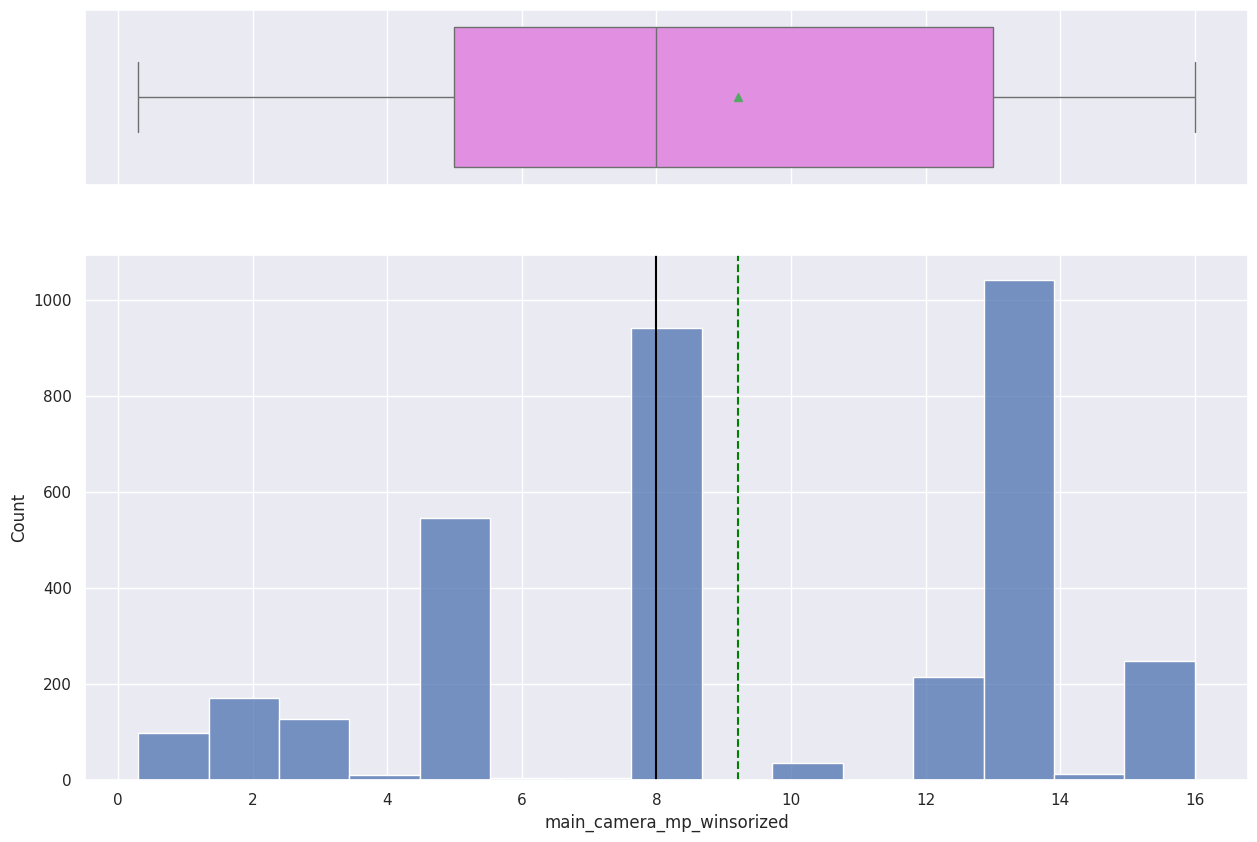

In [ ]:
#plot distribution of main camera mp windsorized
histogram_boxplot(df2, "main_camera_mp_winsorized")

- Comparing main camera mp and the winsorized version, we can see that in the winsorized version, the outliers has been eliminated while retaining the original distribution.

####Distribution of weight_kg

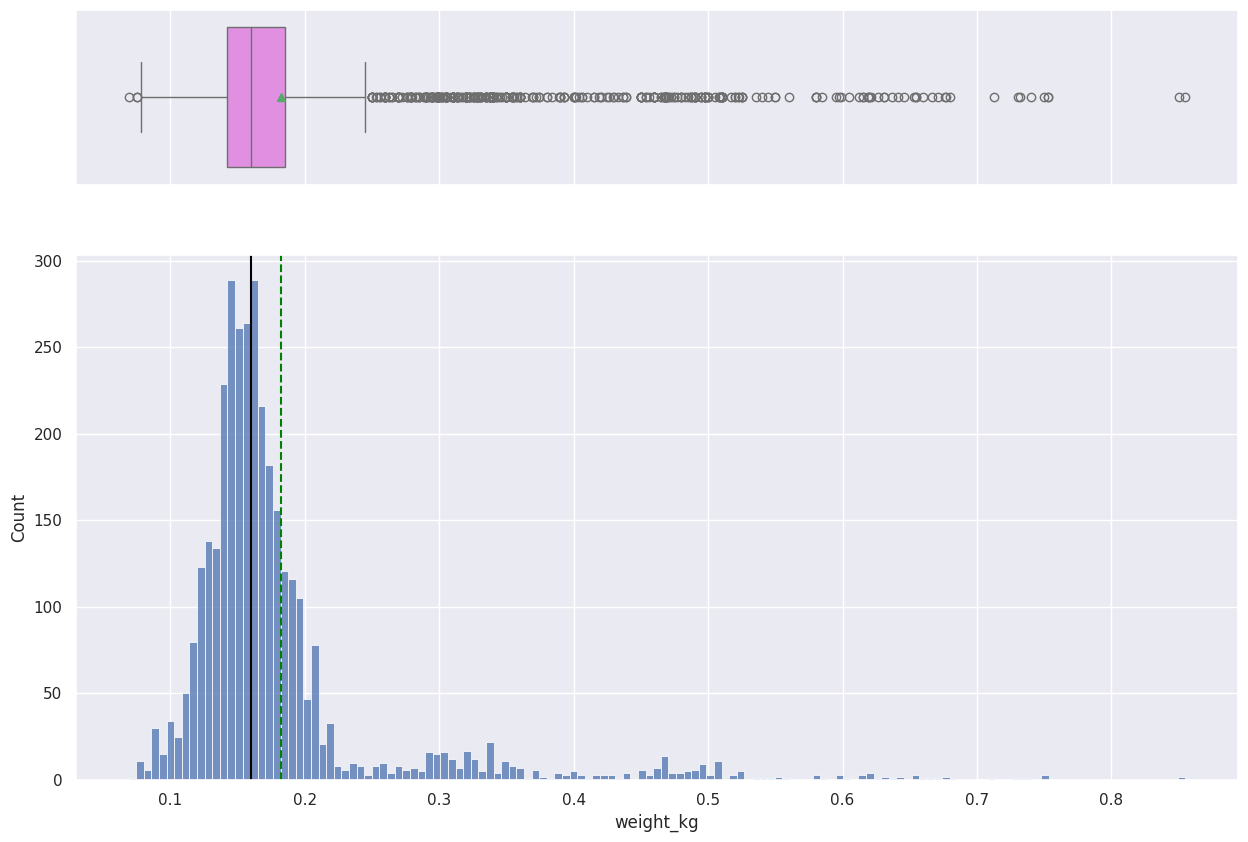

In [ ]:
#plot distribution of weight_kg
histogram_boxplot(df2, "weight_kg")

- Converting from gram to Kg has not done much in reducing outliers.

####Visualizing any changes in distribution between screen size in inches and screen size in CM

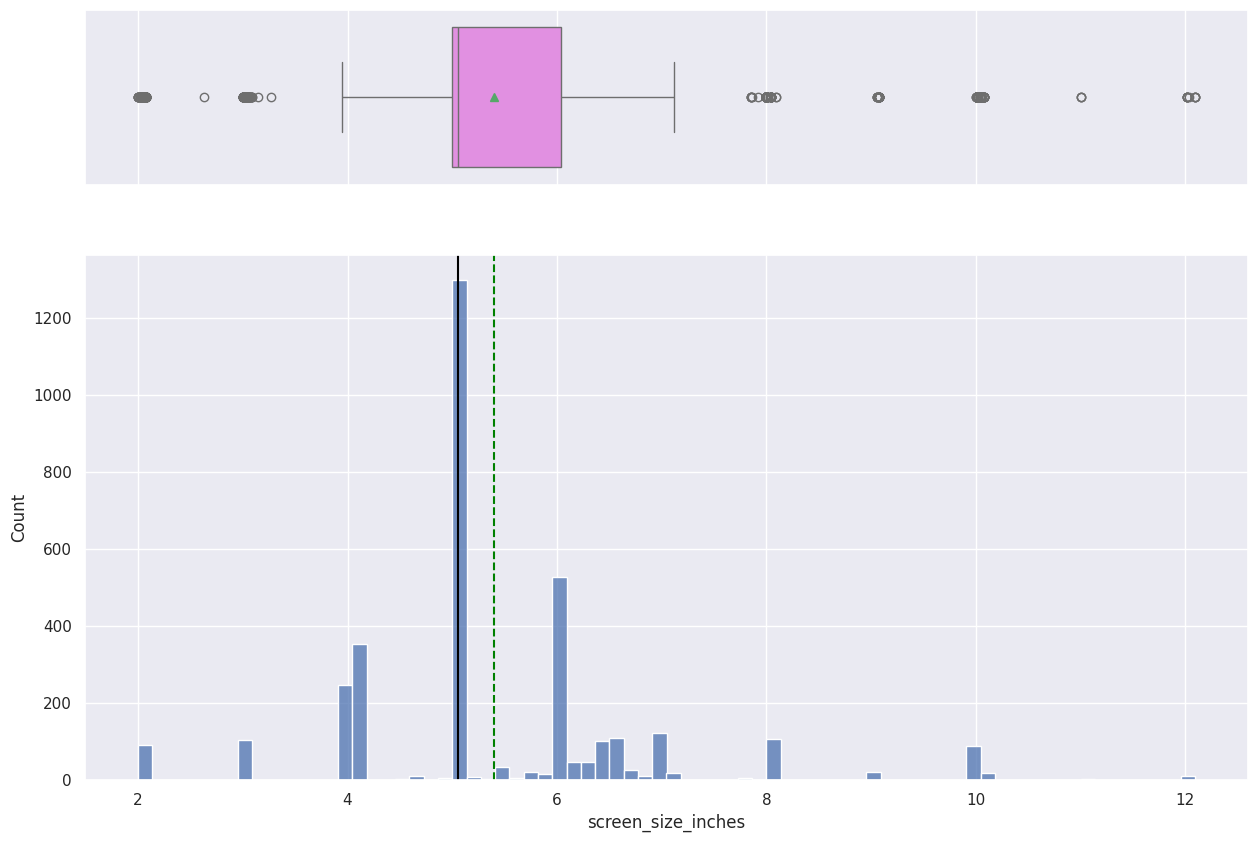

In [ ]:
#plot distribution of screen size inches
histogram_boxplot(df2, "screen_size_inches")

Next, lets define a custom function to aid plot distribution of screen size in cm, the plot the histogram and box plot.

In [ ]:
def histogram_boxplot(project, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=project, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=project, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=project, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        project[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram(green line)
    ax_hist2.axvline(
        project[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram(black line)

Text(0.5, 0, 'Screen size (cm)')

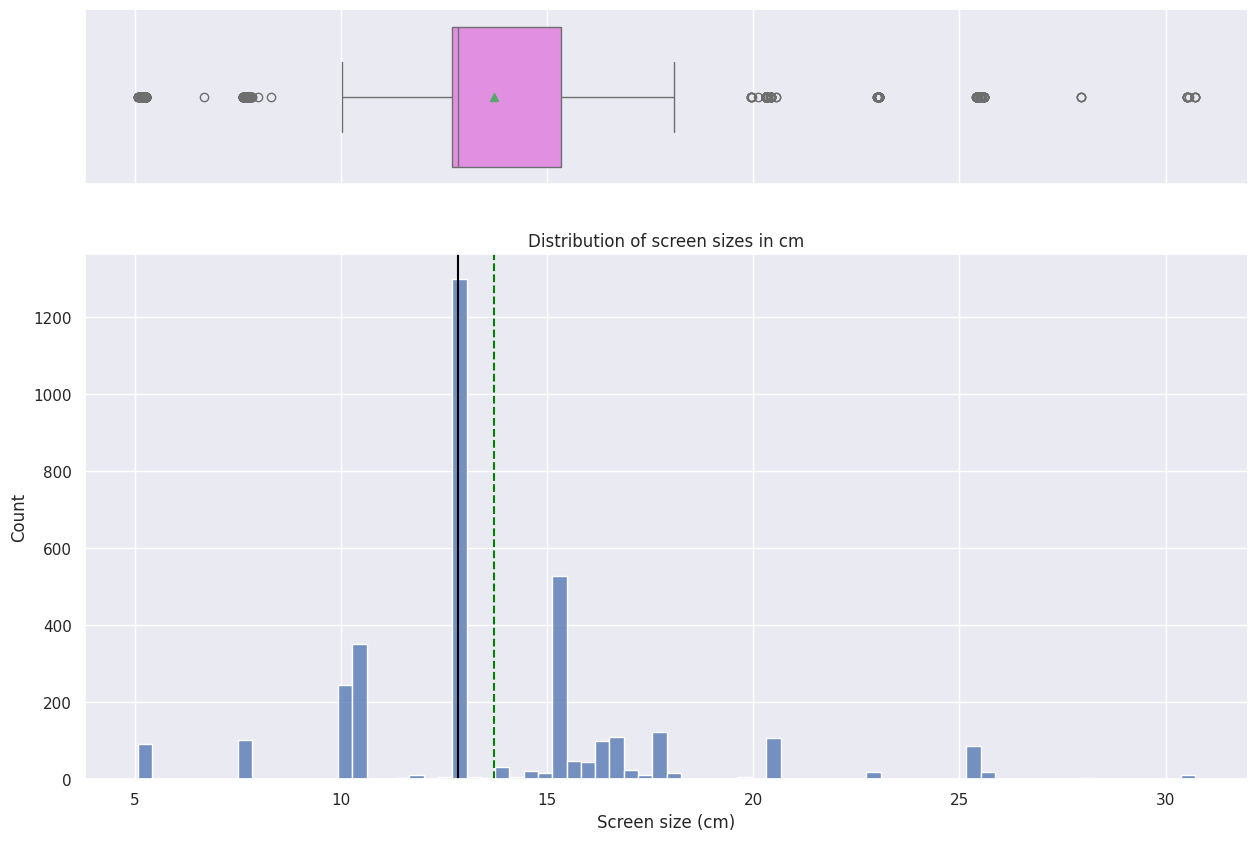

In [ ]:
#Visualizing for screen size in cm
histogram_boxplot(df, 'screen_size')
plt.title('Distribution of screen sizes in cm')
plt.xlabel('Screen size' + ' (cm)')

**Observation**

- There isn't any observed difference in the distribution between screen size in inches compared to those in cm. Meaning their migh be very little impact on the model doing this conversion.

###**2. Bivariate analysis**

- plotting a correlation heatmap

In [ ]:
# creating a list of numerical columns
num_cols_transformed = df2.select_dtypes(include=np.number).columns.tolist()


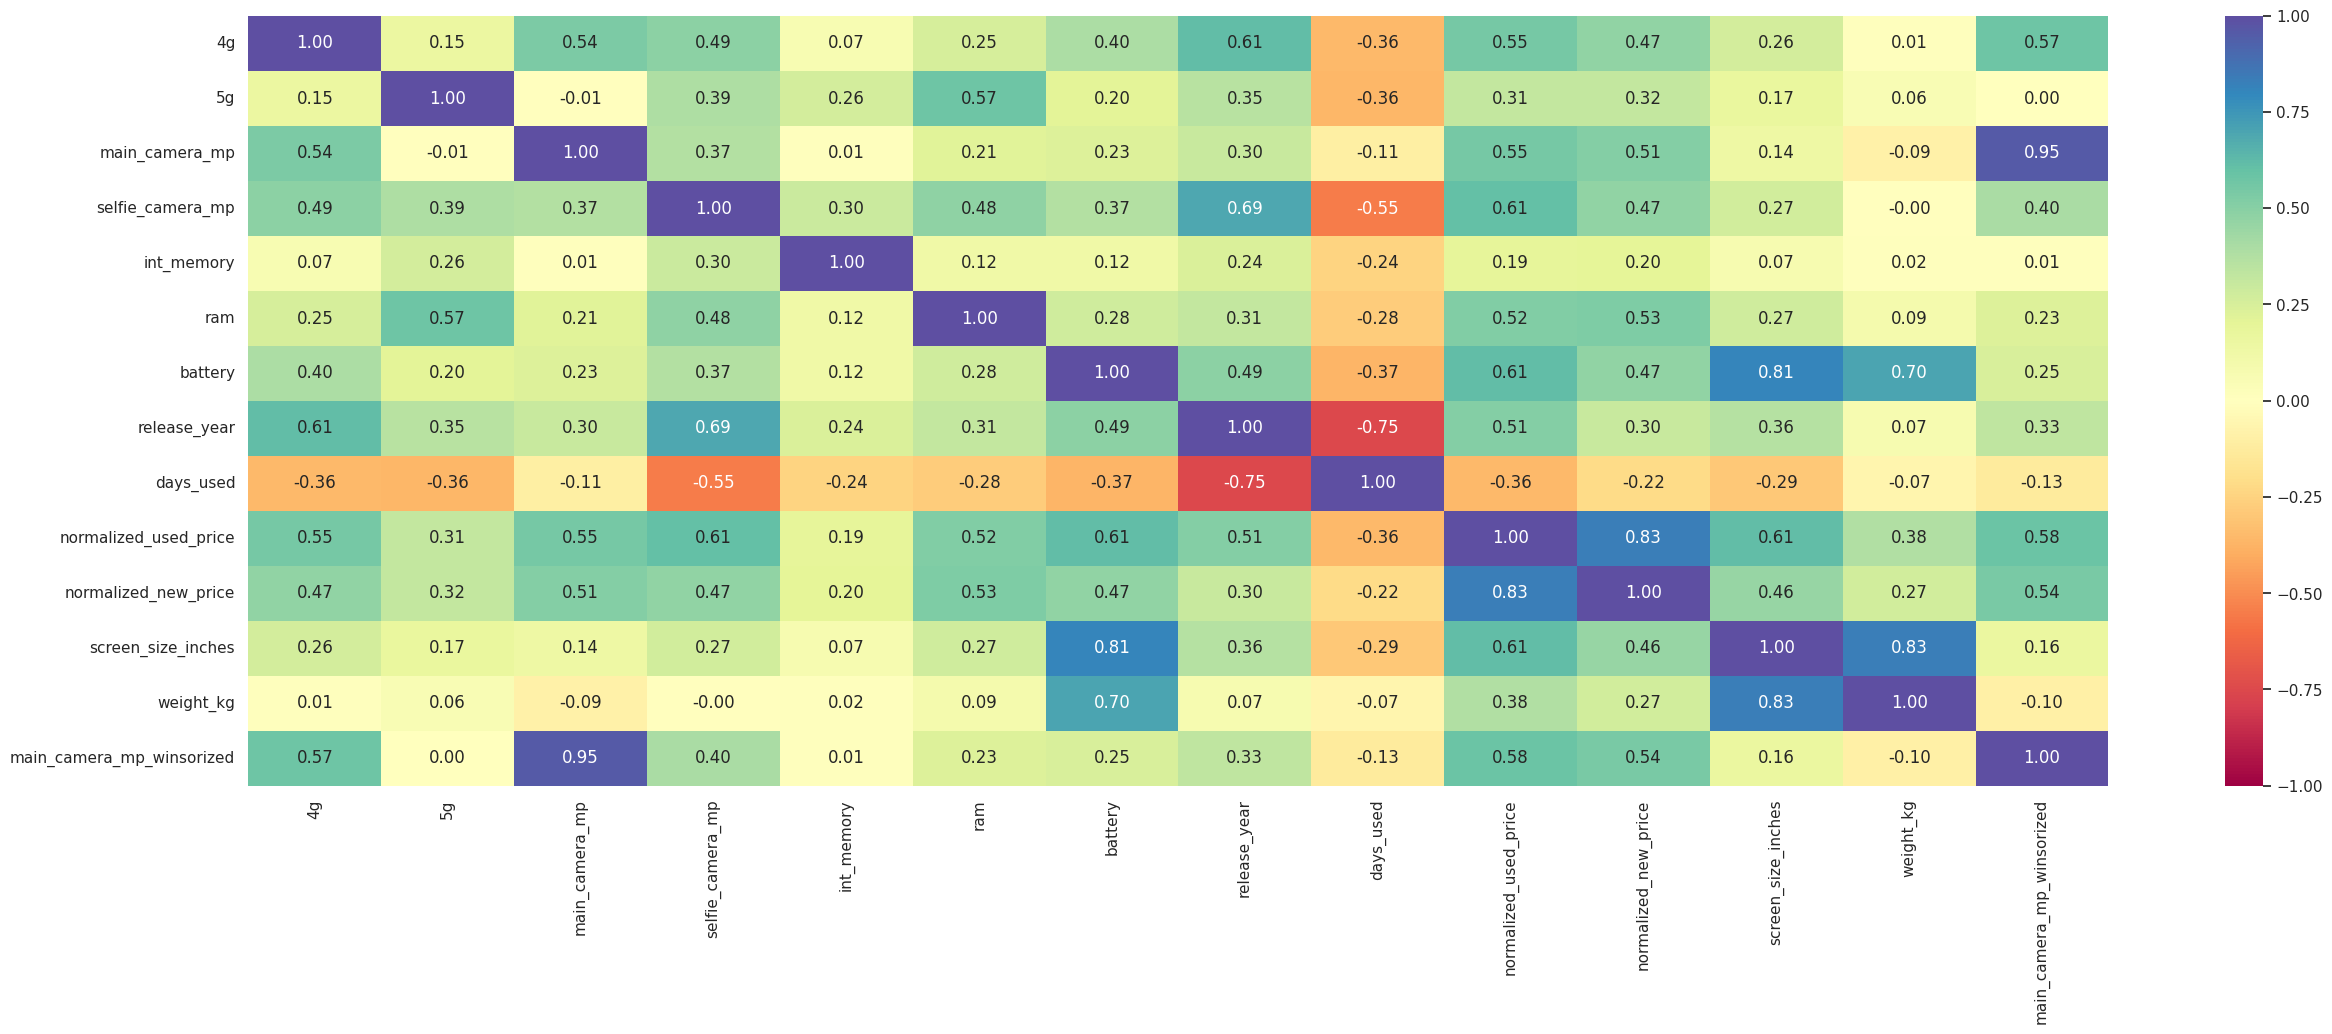

In [ ]:
#Plot correlation heatmap
plt.figure(figsize=(30,10))
sns.heatmap(
    df2[num_cols_transformed].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

plt.show()

- plotting a pair plot of numerical variables

<Figure size 4000x1500 with 0 Axes>

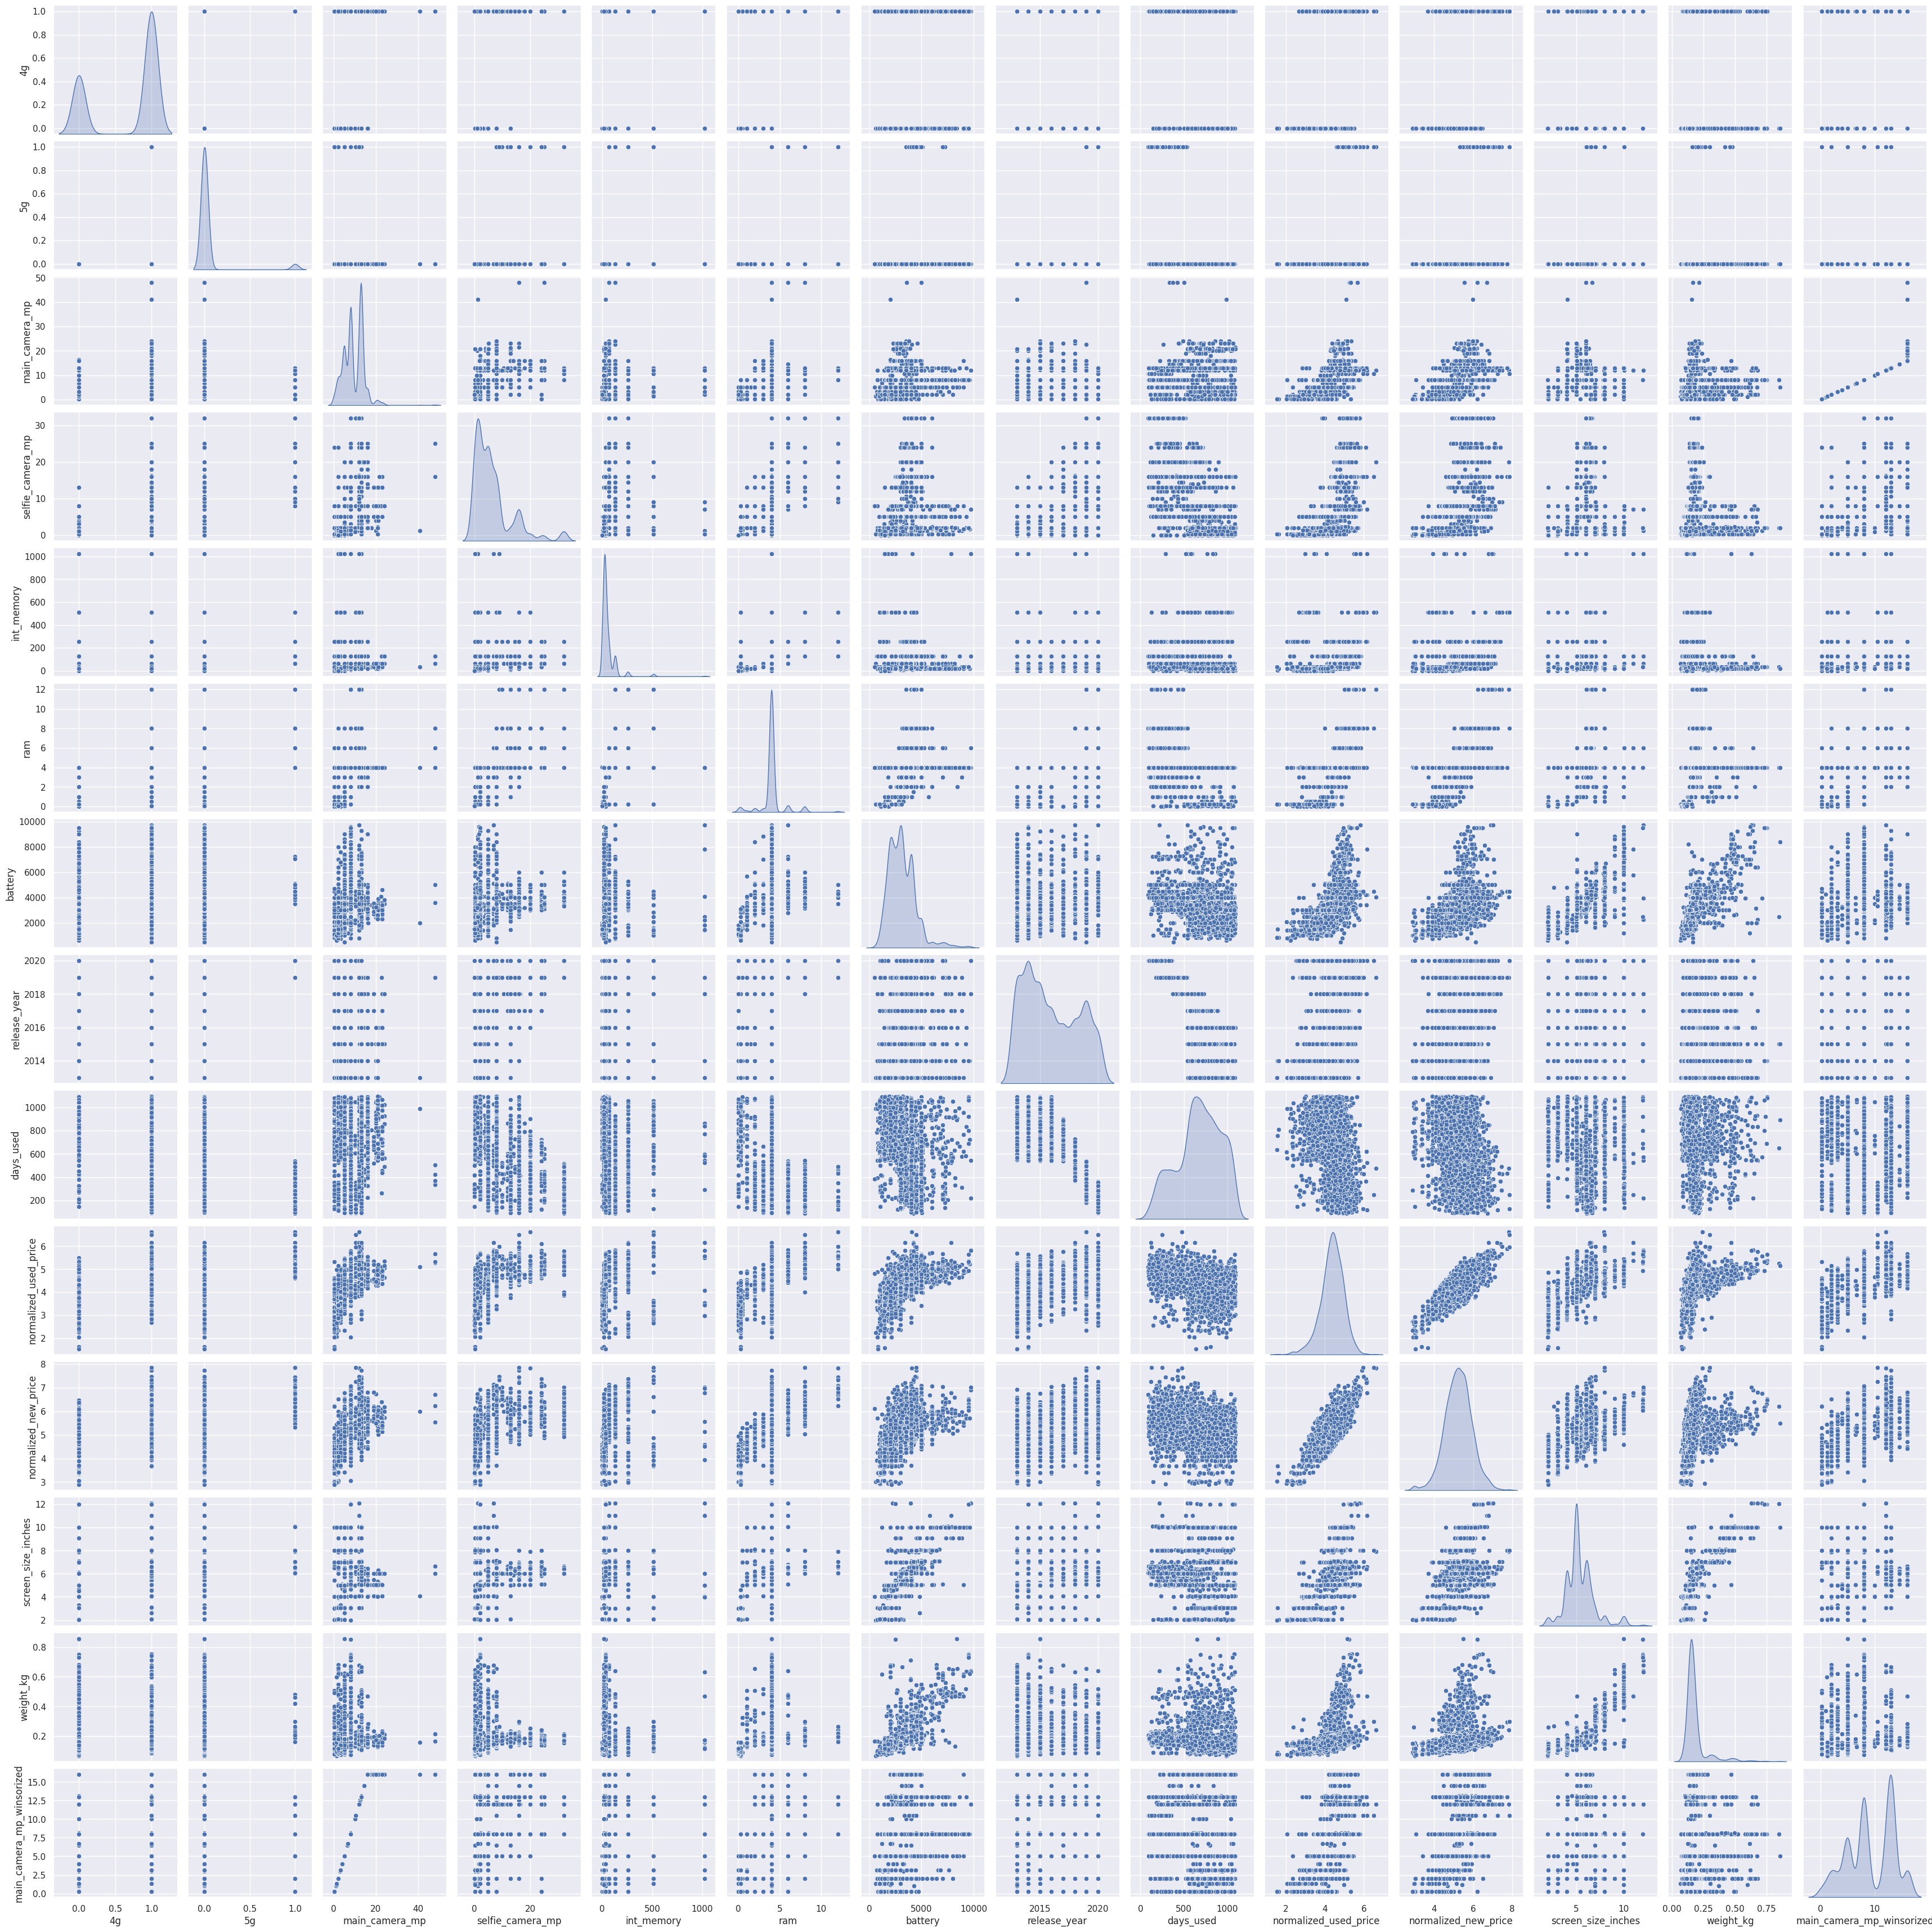

In [ ]:
#Plotting scatterplots of all the numeric variables
plt.figure(figsize=(40,15))
sns.pairplot(
    df2, diag_kind="kde"
)

**Observation**

- There is a high correlation between main_camera_mp and main camera_mp_winsorized which will introduced multicolinearity to my model later. Hence on of them may be dropped latter.

- There is also a high correlation between release year and days used which might introduce multicolinearity,since release year is actually behave more like a categorical data,its likely going to be dropped later after testing for multicolinearity.

- There are also relationships between selfie_camera_mp with days used, and a relationship between selfie_camera_mp with release year. These relationships may also introduce multicolinearity later in the model.

## Model Building - Linear Regression

Lets build a linear regression model based on the processed data.

In [ ]:
#Building regression model with train data
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     990.4
Date:                   Fri, 23 Feb 2024   Prob (F-statistic):               0.00
Time:                           13:20:59   Log-Likelihood:                 107.09
No. Observations:                   2417   AIC:                            -186.2
Df Residuals:                       2403   BIC:                            -105.1
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

## Model Performance Check

Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    
    
* We will create a function which will print out all the above metrics in one go.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df2_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df2_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



RMSE  MAE  R-squared  Adj. R-squared  MAPE
0  0.23 0.18       0.84            0.84  4.37

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



RMSE  MAE  R-squared  Adj. R-squared  MAPE
0  0.24 0.18       0.84            0.84  4.46

* The model is able to explain ~84% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we cannot predict within 4.37% of the normalized used price of device data

* However, lets work on the possible multicolinearities to see if model performance will improve

###**Checking and managing multicolinearity**

- I wil be checking multicolinearities with Variance Inflation factor(VIF).
- For this model, I will tolorated moderate multicolinearities upto 7.

So, lets define custom function to check for multicolinearity.

**Checking Multicolinearity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
#Displaying VIF results
checking_vif(x_train)

feature        VIF
0                       const 3548711.61
1                          4g       2.30
2                          5g       1.75
3              main_camera_mp       9.84
4            selfie_camera_mp       2.54
5                  int_memory       1.25
6                         ram       1.99
7                     battery       3.80
8                release_year       4.58
9                   days_used       2.58
10       normalized_new_price       2.61
11         screen_size_inches       6.22
12                  weight_kg       5.76
13  main_camera_mp_winsorized      11.21

- From this Variance inflation factor table,as well as, from our earlier visualization it is obvious the variables_main_camera_mp_winsorized and main_camera_mp is introducing a lot of colinearity to the model.Hence one of them will be dropped.

**Managing Multicolinearity**

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 7.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 7.

I will be using a custom define function to carry out this task.

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

####Checking main_camera_mp vs main_camera_mp_winsorized for multicolinearity.

In [ ]:
#Checking the impact on the when either of the variables are dropped.
col_list = ["main_camera_mp", "main_camera_mp_winsorized"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

col  Adj. R-squared after_dropping col  \
0  main_camera_mp_winsorized                               0.84   
1             main_camera_mp                               0.83   

   RMSE after dropping col  
0                     0.23  
1                     0.24

- From the above summary main_camera_mp_winsorized does not affect the performance of the model,whereas dropping main_camera_mp reduced model performance. Hence, main_camera_mp_winsorized will be dropped.

In [ ]:
#Dropping the variable introducing multicolinearity and renaming the test and training data for predictors
col_to_drop = "main_camera_mp_winsorized"
x_train2 = x_train.drop(col_to_drop, axis=1)
x_test2 = x_test.drop(col_to_drop, axis=1)

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  main_camera_mp_winsorized


feature        VIF
0                  const 3546678.48
1                     4g       2.27
2                     5g       1.74
3         main_camera_mp       1.90
4       selfie_camera_mp       2.54
5             int_memory       1.25
6                    ram       1.99
7                battery       3.79
8           release_year       4.58
9              days_used       2.57
10  normalized_new_price       2.53
11    screen_size_inches       6.16
12             weight_kg       5.56

Now that all multicolinearities has been cleared, lets run the regression again.

In [ ]:
#Reruning model with optimized values
olsmodel1 = sm.OLS(y_train, x_train2).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     1058.
Date:                   Fri, 23 Feb 2024   Prob (F-statistic):               0.00
Time:                           13:43:12   Log-Likelihood:                 92.316
No. Observations:                   2417   AIC:                            -158.6
Df Residuals:                       2404   BIC:                            -83.36
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

- Re-running the model with optimized data has lead to reduction in p values of a lot of variables, some variables have p values that have reduced to significance levels, examples is main_camera_mp

Having dealt with multicolinearities,let's turn our attention to eliminating insignificant variables with high p values.

###**Dealing with High P-values**

- Some P-values of the variable are greater than 0.05,hence will be dropping them ones at a time starting from the highest,just to see how it affect the p-values of the rest variables.
- When the there are no more variables with p-values greater than 0.05,then the task is completed.Then I will proceed to testing assumptions for linear regression.
- I will be defining and using a custom function for this task.

In [ ]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', '4g', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'release_year', 'normalized_new_price', 'screen_size_inches', 'weight_kg']


renaming dataset with optimised p-values(high p-values removed)

In [ ]:
# Renaming training and test data set with newly optimized values
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

- Running regression model again to check new performance

In [ ]:
# Re-running model with newly optimized data
olsmodel2 = sm.OLS(y_train, x_train3).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     1584.
Date:                   Fri, 23 Feb 2024   Prob (F-statistic):               0.00
Time:                           14:15:26   Log-Likelihood:                 89.094
No. Observations:                   2417   AIC:                            -160.2
Df Residuals:                       2408   BIC:                            -108.1
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

- The following variables were dropped due to high p values: Int_memory,battery,days used, and 5g.
- P values for the remaning significant variables reduced tremendiously.

###**Checking model performance again**

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel2, x_train3, y_train)
olsmodel_train_perf

Training Performance



RMSE  MAE  R-squared  Adj. R-squared  MAPE
0  0.23 0.18       0.84            0.84  4.40

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel2, x_test3, y_test)
olsmodel_test_perf

Test Performance



RMSE  MAE  R-squared  Adj. R-squared  MAPE
0  0.24 0.18       0.84            0.84  4.46

- There are no signifiacant changes to the model performance as expected before optimizing for multicolinearity and high p value. Infact model performance dropped by 0.003,but the drop is insignificant,thus we can proceed with this model to check wether assumptions for linear regression has been met.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

- Test for multicolinearity has been done and handled earlier,so we will not do it again in this section.

###**Test of Linearity and Independence**

To check for linearity and independence, we will do the following:
- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.


In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

Actual Values  Fitted Values  Residuals
3026           4.09           3.86       0.23
1525           4.45           4.59      -0.15
1128           4.32           4.29       0.03
3003           4.28           4.25       0.03
2907           4.46           4.48      -0.02

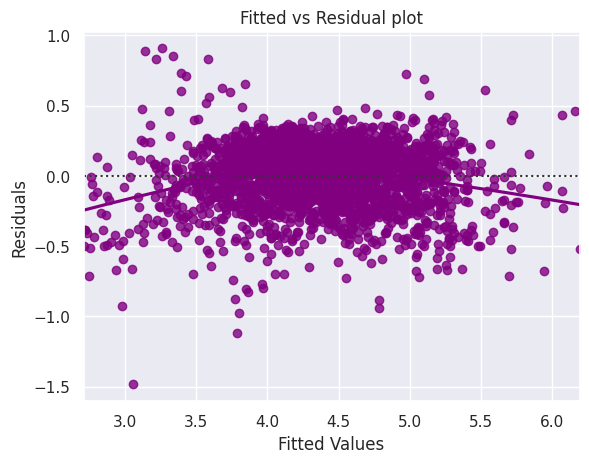

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations**

- From the above plot, the residuals are not showing any clear pattern
- Thus, we can conclude that the model is linear and and residuals are independent.

###**Test of normality**

We will be checking for residual normality following these steps.

- Plot histogram  of the distribution of residuals.The shape of the histogram of residuals can give an initial idea about the normality.
- It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.

- An additional test I will perform will be to check for normality using the Shapiro-Wilk test. Whose interpretation will be as follow:

Null hypothesis: Residuals are normally distributed

Alternate hypothesis: Residuals are not normally distributed

P value greater than 0.05 means the null hypothesis will be accepted.

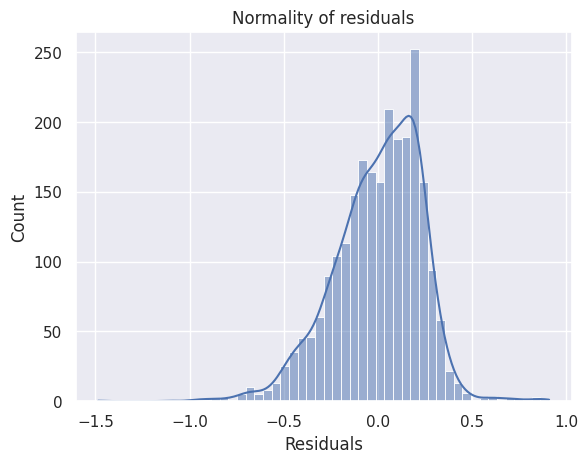

In [ ]:
#Plotting the distribution of residuals
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The distribution of residuals though slightly skewwed to the left could be considered normal, thus condition for

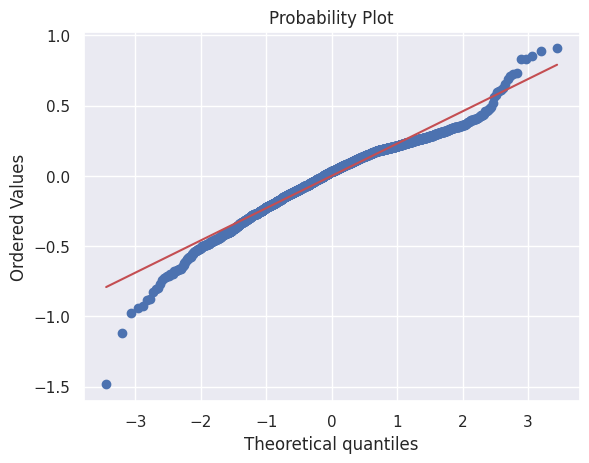

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [ ]:
#Running Shapiro-wilks test
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.969733476638794, pvalue=3.583213733486345e-22)

P-values are less than 0.05 which means the distribution of residuals deviate significantly from a normal distribution.
However, since the deviation from normal is very insignificant as seen in the histogram plot, Assumption of normality of residuals will be accepted.

###**Test of Homoscedasticity**

- We will carry out the following steps to test for homoscedascity of residuals:


The goldfeldquandt test can also be used.

If we get a p-value > 0.05 we can say that the residuals are homoscedastic.

Otherwise, they are heteroscedastic.

Null hypothesis: Residuals are homoscedastic

Alternate hypothesis: Residuals have heteroscedasticity

In [ ]:
#Importing required library for test
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

#Creating temp variable to run test
name = ["F statistic", "p-value"]
#Running test and printing result
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0536786282386303), ('p-value', 0.18267222360599775)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

## Final Model

Recreating the final Model and printing results to gain more insights

In [ ]:
#Assingning a name to the final optimized data for the model
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [ ]:
#Running final model
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     1584.
Date:                   Fri, 23 Feb 2024   Prob (F-statistic):               0.00
Time:                           15:05:21   Log-Likelihood:                 89.094
No. Observations:                   2417   AIC:                            -160.2
Df Residuals:                       2408   BIC:                            -108.1
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**Next check model performance on training and test data and check for over fitting and under fitting**

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



RMSE  MAE  R-squared  Adj. R-squared  MAPE
0  0.23 0.18       0.84            0.84  4.40

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



RMSE  MAE  R-squared  Adj. R-squared  MAPE
0  0.24 0.18       0.84            0.84  4.46

* The model is able to explain ~84% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we cannot predict within 4.46% of the normalized used price of device data


* Hence, we can conclude the model *olsmodel_final_test_perf* is good for prediction as well as inference purposes

In [ ]:
# predictions on the test set
pred = olsmodel_final.predict(x_test_final)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(20, random_state=1)

Actual  Predicted
1995    4.57       4.38
2341    3.70       3.96
1913    3.59       3.71
688     4.31       4.11
650     4.52       5.13
2291    4.26       4.39
40      5.00       5.48
1884    3.88       4.07
2538    4.21       4.04
45      5.38       5.31
553     3.22       3.40
3229    4.65       4.68
1892    4.81       4.56
1696    3.91       4.07
3254    5.18       5.37
3143    4.84       4.76
136     4.02       4.02
3187    4.87       5.09
1754    3.68       3.54
1047    4.34       4.81

- We can observe from the above that the predicted dependent variable is quite close the actual value which further buttress on the accuracy of the model built.

## Actionable Insights and Recommendations

1. The model is able to explain ~84% of the variation in the data and within 4.46% of normalized used prices in the data set which is quite good. This indicates that the model is good for prediction as well as inference purposes.

2. If the normalized used price of device increase by 0.04 then 4g will increase by 1 unit, with all other variable held constant.

3. If the normalized used price of device increase by 0.02 then main_camera_mp will increase by 1 unit, with all other variable held constant.

4. If the normalized used price of device increase by 0.014 then selfie_camera_mp will increase by 1 unit, with all other variable held constant.

5. If the normalized used price of device increase by 0.022 then Ram will increase by 1 unit, with all other variable held constant.

6. If the normalized used price of device increase by 0.021 then release year will increase by 1 unit, with all other variable held constant.

7. If the normalized used price of device increase by 0.41 then normalized new price will increase by 1 unit, with all other variable held constant.

8. If the normalized used price of device increase by 0.067 then screen size inches will increase by 1 unit, with all other variable held constant.

9. If the normalized used price of device increase by 0.77 then weight_kg will increase by 1 unit, with all other variable held constant.

10. The data on phones with 5g needs to be rechecked for correctness, since over 90% of phones have 5g phone, but more than 50%of phones in the data set were released before 2019(5g release year).

11. Phones with 5 inches screen sized were the most sold, hence these phone should be prioritized for sale.

12.


-


___